In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'QzpcVXNlcnNcY29jYWRccHJvamV0b3NcbWluZXJhY2FvX2RlX2RhZG9zXGF0aXZpZGFkZV8y'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

C:\Users\cocad\AppData\Local\Temp\ipykernel_13412\2849764531.py:25: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"C:\\Users\\cocad\\miniconda3\\envs\\tensorflow_env\\lib\\importlib\\_bootstrap.py": 1692881185.0, "C:\\Users\\cocad\\miniconda3\\envs\\tensorflow_env\\lib\\importlib\\_bootstrap_external.py": 1692881185.0, "C:\\Users\\cocad\\miniconda3\\envs\\tensorflow_env\\lib\\codecs.py": 1692881185.0, "C:\\Users\\cocad\\miniconda3\\envs\\tensorflow_env\\lib\\encodings\\aliases.py": 1692881185.0, "C:\\Users\\cocad\\miniconda3\\envs\\tensorflow_env\\lib\\encodings\\__init__.py": 1692881185.0, "C:\\Users\\cocad\\miniconda3\\envs\\tensorflow_env\\lib\\encodings\\utf_8.py": 1692881185.0, "C:\\Users\\cocad\\miniconda3\\envs\\tensorflow_env\\lib\\encodings\\cp1252.py": 1692881185.0, "C:\\Users\\cocad\\miniconda3\\envs\\tensorflow_env\\lib\\abc.py": 1692881185.0, "C:\\Users\\cocad\\miniconda3\\envs\\tensorflow_env\\lib\\io.py": 1692881185.0, "C:\\Users\\cocad\\miniconda3\\envs\\tensorflow_env\\lib\\stat.py": 1692881185.0, "C:\\Users\\cocad\\miniconda3\\envs\\tensorflow_env\\lib\\_collections_abc.py": 169

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import random

data = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = data.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  
    keras.layers.Dense(70, activation='relu'),  
    keras.layers.Dense(10, activation='softmax') 
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [3]:
epochs = 20  
history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test))

loss, accuracy = model.evaluate(x_test, y_test)
print(f'Perda: {loss:.4f}, Acurácia: {accuracy:.4f}')

Epoch 1/20


   1/1875 [..............................] - ETA: 25:34 - loss: 2.5252 - accuracy: 0.0625

  17/1875 [..............................] - ETA: 5s - loss: 1.9971 - accuracy: 0.3989   

  31/1875 [..............................] - ETA: 6s - loss: 1.7121 - accuracy: 0.5292

  48/1875 [..............................] - ETA: 6s - loss: 1.4558 - accuracy: 0.6191

  68/1875 [>.............................] - ETA: 5s - loss: 1.2447 - accuracy: 0.6650

  90/1875 [>.............................] - ETA: 5s - loss: 1.0831 - accuracy: 0.7108

 112/1875 [>.............................] - ETA: 4s - loss: 0.9689 - accuracy: 0.7419

 131/1875 [=>............................] - ETA: 4s - loss: 0.9056 - accuracy: 0.7574

 145/1875 [=>............................] - ETA: 4s - loss: 0.8626 - accuracy: 0.7688

 161/1875 [=>............................] - ETA: 5s - loss: 0.8205 - accuracy: 0.7789

 178/1875 [=>............................] - ETA: 4s - loss: 0.7800 - accuracy: 0.7904

 195/1875 [==>...........................] - ETA: 4s - loss: 0.7522 - accuracy: 0.7974

 213/1875 [==>...........................] - ETA: 4s - loss: 0.7220 - accuracy: 0.8049

 228/1875 [==>...........................] - ETA: 4s - loss: 0.6973 - accuracy: 0.8110

 246/1875 [==>...........................] - ETA: 4s - loss: 0.6755 - accuracy: 0.8169

 265/1875 [===>..........................] - ETA: 4s - loss: 0.6571 - accuracy: 0.8216

 286/1875 [===>..........................] - ETA: 4s - loss: 0.6358 - accuracy: 0.8262

 305/1875 [===>..........................] - ETA: 4s - loss: 0.6158 - accuracy: 0.8309

 327/1875 [====>.........................] - ETA: 4s - loss: 0.5952 - accuracy: 0.8371

 348/1875 [====>.........................] - ETA: 4s - loss: 0.5763 - accuracy: 0.8423

 367/1875 [====>.........................] - ETA: 4s - loss: 0.5647 - accuracy: 0.8453

 381/1875 [=====>........................] - ETA: 4s - loss: 0.5576 - accuracy: 0.8472

 397/1875 [=====>........................] - ETA: 4s - loss: 0.5487 - accuracy: 0.8493

 420/1875 [=====>........................] - ETA: 4s - loss: 0.5374 - accuracy: 0.8528

 440/1875 [======>.......................] - ETA: 4s - loss: 0.5261 - accuracy: 0.8554

 462/1875 [======>.......................] - ETA: 3s - loss: 0.5165 - accuracy: 0.8581

 485/1875 [======>.......................] - ETA: 3s - loss: 0.5076 - accuracy: 0.8613

 508/1875 [=======>......................] - ETA: 3s - loss: 0.4984 - accuracy: 0.8640

 530/1875 [=======>......................] - ETA: 3s - loss: 0.4901 - accuracy: 0.8660

 552/1875 [=======>......................] - ETA: 3s - loss: 0.4805 - accuracy: 0.8682

 574/1875 [========>.....................] - ETA: 3s - loss: 0.4737 - accuracy: 0.8697

 598/1875 [========>.....................] - ETA: 3s - loss: 0.4657 - accuracy: 0.8721

 618/1875 [========>.....................] - ETA: 3s - loss: 0.4602 - accuracy: 0.8734

 640/1875 [=========>....................] - ETA: 3s - loss: 0.4529 - accuracy: 0.8754

 663/1875 [=========>....................] - ETA: 3s - loss: 0.4446 - accuracy: 0.8775

 687/1875 [=========>....................] - ETA: 3s - loss: 0.4373 - accuracy: 0.8794

 712/1875 [==========>...................] - ETA: 3s - loss: 0.4310 - accuracy: 0.8812

 730/1875 [==========>...................] - ETA: 2s - loss: 0.4271 - accuracy: 0.8821

 750/1875 [===========>..................] - ETA: 2s - loss: 0.4241 - accuracy: 0.8830

 771/1875 [===========>..................] - ETA: 2s - loss: 0.4203 - accuracy: 0.8841

 794/1875 [===========>..................] - ETA: 2s - loss: 0.4160 - accuracy: 0.8852

 816/1875 [============>.................] - ETA: 2s - loss: 0.4123 - accuracy: 0.8858

 838/1875 [============>.................] - ETA: 2s - loss: 0.4079 - accuracy: 0.8870

 860/1875 [============>.................] - ETA: 2s - loss: 0.4027 - accuracy: 0.8884

 883/1875 [=============>................] - ETA: 2s - loss: 0.3980 - accuracy: 0.8895

 905/1875 [=============>................] - ETA: 2s - loss: 0.3932 - accuracy: 0.8908

 927/1875 [=============>................] - ETA: 2s - loss: 0.3913 - accuracy: 0.8913

 950/1875 [==============>...............] - ETA: 2s - loss: 0.3873 - accuracy: 0.8927

 974/1875 [==============>...............] - ETA: 2s - loss: 0.3840 - accuracy: 0.8931

 996/1875 [==============>...............] - ETA: 2s - loss: 0.3822 - accuracy: 0.8936

1019/1875 [===============>..............] - ETA: 2s - loss: 0.3795 - accuracy: 0.8944

1042/1875 [===============>..............] - ETA: 2s - loss: 0.3754 - accuracy: 0.8956

1065/1875 [================>.............] - ETA: 2s - loss: 0.3717 - accuracy: 0.8967

1089/1875 [================>.............] - ETA: 1s - loss: 0.3684 - accuracy: 0.8974

1111/1875 [================>.............] - ETA: 1s - loss: 0.3658 - accuracy: 0.8982

1133/1875 [=================>............] - ETA: 1s - loss: 0.3632 - accuracy: 0.8988

1157/1875 [=================>............] - ETA: 1s - loss: 0.3603 - accuracy: 0.8998

1181/1875 [=================>............] - ETA: 1s - loss: 0.3575 - accuracy: 0.9004

1196/1875 [==================>...........] - ETA: 1s - loss: 0.3560 - accuracy: 0.9009

1217/1875 [==================>...........] - ETA: 1s - loss: 0.3526 - accuracy: 0.9018

1240/1875 [==================>...........] - ETA: 1s - loss: 0.3504 - accuracy: 0.9022

1264/1875 [===================>..........] - ETA: 1s - loss: 0.3482 - accuracy: 0.9029

1288/1875 [===================>..........] - ETA: 1s - loss: 0.3459 - accuracy: 0.9036

1311/1875 [===================>..........] - ETA: 1s - loss: 0.3438 - accuracy: 0.9041

1333/1875 [====================>.........] - ETA: 1s - loss: 0.3418 - accuracy: 0.9047

1356/1875 [====================>.........] - ETA: 1s - loss: 0.3389 - accuracy: 0.9056

1380/1875 [=====================>........] - ETA: 1s - loss: 0.3366 - accuracy: 0.9062

1398/1875 [=====================>........] - ETA: 1s - loss: 0.3351 - accuracy: 0.9066

1419/1875 [=====================>........] - ETA: 1s - loss: 0.3327 - accuracy: 0.9072

1441/1875 [======================>.......] - ETA: 1s - loss: 0.3307 - accuracy: 0.9078

1465/1875 [======================>.......] - ETA: 1s - loss: 0.3281 - accuracy: 0.9086

1488/1875 [======================>.......] - ETA: 0s - loss: 0.3254 - accuracy: 0.9093

1512/1875 [=======================>......] - ETA: 0s - loss: 0.3227 - accuracy: 0.9099

1536/1875 [=======================>......] - ETA: 0s - loss: 0.3203 - accuracy: 0.9105

1561/1875 [=======================>......] - ETA: 0s - loss: 0.3180 - accuracy: 0.9113

1585/1875 [========================>.....] - ETA: 0s - loss: 0.3160 - accuracy: 0.9118

1609/1875 [========================>.....] - ETA: 0s - loss: 0.3142 - accuracy: 0.9123

1632/1875 [=========================>....] - ETA: 0s - loss: 0.3121 - accuracy: 0.9129

1655/1875 [=========================>....] - ETA: 0s - loss: 0.3102 - accuracy: 0.9134

1678/1875 [=========================>....] - ETA: 0s - loss: 0.3084 - accuracy: 0.9139

1702/1875 [==========================>...] - ETA: 0s - loss: 0.3068 - accuracy: 0.9144

1723/1875 [==========================>...] - ETA: 0s - loss: 0.3062 - accuracy: 0.9147

1746/1875 [==========================>...] - ETA: 0s - loss: 0.3045 - accuracy: 0.9151

1770/1875 [===========================>..] - ETA: 0s - loss: 0.3027 - accuracy: 0.9156

1794/1875 [===========================>..] - ETA: 0s - loss: 0.3013 - accuracy: 0.9160

1817/1875 [============================>.] - ETA: 0s - loss: 0.2994 - accuracy: 0.9165

1839/1875 [============================>.] - ETA: 0s - loss: 0.2979 - accuracy: 0.9168

1862/1875 [============================>.] - ETA: 0s - loss: 0.2962 - accuracy: 0.9174

1875/1875 [==============================] - 6s 3ms/step - loss: 0.2951 - accuracy: 0.9177 - val_loss: 0.1643 - val_accuracy: 0.9520


Epoch 2/20


   1/1875 [..............................] - ETA: 8s - loss: 0.0113 - accuracy: 1.0000

  23/1875 [..............................] - ETA: 4s - loss: 0.1549 - accuracy: 0.9552

  46/1875 [..............................] - ETA: 4s - loss: 0.1586 - accuracy: 0.9572

  68/1875 [>.............................] - ETA: 4s - loss: 0.1621 - accuracy: 0.9527

  92/1875 [>.............................] - ETA: 4s - loss: 0.1691 - accuracy: 0.9531

 115/1875 [>.............................] - ETA: 3s - loss: 0.1664 - accuracy: 0.9524

 138/1875 [=>............................] - ETA: 3s - loss: 0.1664 - accuracy: 0.9527

 160/1875 [=>............................] - ETA: 3s - loss: 0.1629 - accuracy: 0.9537

 183/1875 [=>............................] - ETA: 3s - loss: 0.1662 - accuracy: 0.9527

 201/1875 [==>...........................] - ETA: 3s - loss: 0.1636 - accuracy: 0.9532

 218/1875 [==>...........................] - ETA: 3s - loss: 0.1639 - accuracy: 0.9530

 237/1875 [==>...........................] - ETA: 3s - loss: 0.1603 - accuracy: 0.9541

 258/1875 [===>..........................] - ETA: 3s - loss: 0.1628 - accuracy: 0.9534

 280/1875 [===>..........................] - ETA: 3s - loss: 0.1596 - accuracy: 0.9546

 304/1875 [===>..........................] - ETA: 3s - loss: 0.1601 - accuracy: 0.9544

 327/1875 [====>.........................] - ETA: 3s - loss: 0.1594 - accuracy: 0.9544

 352/1875 [====>.........................] - ETA: 3s - loss: 0.1590 - accuracy: 0.9542

 375/1875 [=====>........................] - ETA: 3s - loss: 0.1586 - accuracy: 0.9539

 397/1875 [=====>........................] - ETA: 3s - loss: 0.1628 - accuracy: 0.9535

 420/1875 [=====>........................] - ETA: 3s - loss: 0.1624 - accuracy: 0.9536

 443/1875 [======>.......................] - ETA: 3s - loss: 0.1599 - accuracy: 0.9545

 464/1875 [======>.......................] - ETA: 3s - loss: 0.1584 - accuracy: 0.9547

 488/1875 [======>.......................] - ETA: 3s - loss: 0.1582 - accuracy: 0.9547

 511/1875 [=======>......................] - ETA: 3s - loss: 0.1568 - accuracy: 0.9553

 535/1875 [=======>......................] - ETA: 3s - loss: 0.1567 - accuracy: 0.9554

 556/1875 [=======>......................] - ETA: 3s - loss: 0.1552 - accuracy: 0.9559

 580/1875 [========>.....................] - ETA: 2s - loss: 0.1564 - accuracy: 0.9557

 604/1875 [========>.....................] - ETA: 2s - loss: 0.1555 - accuracy: 0.9558

 626/1875 [=========>....................] - ETA: 2s - loss: 0.1562 - accuracy: 0.9554

 651/1875 [=========>....................] - ETA: 2s - loss: 0.1560 - accuracy: 0.9553

 674/1875 [=========>....................] - ETA: 2s - loss: 0.1559 - accuracy: 0.9554

 697/1875 [==========>...................] - ETA: 2s - loss: 0.1544 - accuracy: 0.9556

 717/1875 [==========>...................] - ETA: 2s - loss: 0.1548 - accuracy: 0.9558

 742/1875 [==========>...................] - ETA: 2s - loss: 0.1540 - accuracy: 0.9560

 764/1875 [===========>..................] - ETA: 2s - loss: 0.1534 - accuracy: 0.9562

 788/1875 [===========>..................] - ETA: 2s - loss: 0.1537 - accuracy: 0.9561

 812/1875 [===========>..................] - ETA: 2s - loss: 0.1532 - accuracy: 0.9561

 835/1875 [============>.................] - ETA: 2s - loss: 0.1527 - accuracy: 0.9563

 859/1875 [============>.................] - ETA: 2s - loss: 0.1520 - accuracy: 0.9564

 882/1875 [=============>................] - ETA: 2s - loss: 0.1530 - accuracy: 0.9560

 905/1875 [=============>................] - ETA: 2s - loss: 0.1530 - accuracy: 0.9560

 929/1875 [=============>................] - ETA: 2s - loss: 0.1528 - accuracy: 0.9560

 952/1875 [==============>...............] - ETA: 2s - loss: 0.1523 - accuracy: 0.9559

 974/1875 [==============>...............] - ETA: 2s - loss: 0.1519 - accuracy: 0.9560

 995/1875 [==============>...............] - ETA: 2s - loss: 0.1517 - accuracy: 0.9562

1016/1875 [===============>..............] - ETA: 1s - loss: 0.1510 - accuracy: 0.9564

1041/1875 [===============>..............] - ETA: 1s - loss: 0.1500 - accuracy: 0.9567

1064/1875 [================>.............] - ETA: 1s - loss: 0.1500 - accuracy: 0.9567

1086/1875 [================>.............] - ETA: 1s - loss: 0.1494 - accuracy: 0.9569

1110/1875 [================>.............] - ETA: 1s - loss: 0.1497 - accuracy: 0.9566

1132/1875 [=================>............] - ETA: 1s - loss: 0.1490 - accuracy: 0.9568

1154/1875 [=================>............] - ETA: 1s - loss: 0.1489 - accuracy: 0.9568

1176/1875 [=================>............] - ETA: 1s - loss: 0.1488 - accuracy: 0.9570

1198/1875 [==================>...........] - ETA: 1s - loss: 0.1483 - accuracy: 0.9572

1221/1875 [==================>...........] - ETA: 1s - loss: 0.1478 - accuracy: 0.9572

1245/1875 [==================>...........] - ETA: 1s - loss: 0.1478 - accuracy: 0.9573

1267/1875 [===================>..........] - ETA: 1s - loss: 0.1473 - accuracy: 0.9572

1290/1875 [===================>..........] - ETA: 1s - loss: 0.1469 - accuracy: 0.9572

1311/1875 [===================>..........] - ETA: 1s - loss: 0.1468 - accuracy: 0.9572

1334/1875 [====================>.........] - ETA: 1s - loss: 0.1464 - accuracy: 0.9573

1354/1875 [====================>.........] - ETA: 1s - loss: 0.1463 - accuracy: 0.9573

1378/1875 [=====================>........] - ETA: 1s - loss: 0.1461 - accuracy: 0.9572

1399/1875 [=====================>........] - ETA: 1s - loss: 0.1462 - accuracy: 0.9572

1422/1875 [=====================>........] - ETA: 1s - loss: 0.1458 - accuracy: 0.9574

1446/1875 [======================>.......] - ETA: 0s - loss: 0.1454 - accuracy: 0.9575

1470/1875 [======================>.......] - ETA: 0s - loss: 0.1454 - accuracy: 0.9576

1493/1875 [======================>.......] - ETA: 0s - loss: 0.1449 - accuracy: 0.9577

1517/1875 [=======================>......] - ETA: 0s - loss: 0.1451 - accuracy: 0.9576

1539/1875 [=======================>......] - ETA: 0s - loss: 0.1451 - accuracy: 0.9577

1561/1875 [=======================>......] - ETA: 0s - loss: 0.1449 - accuracy: 0.9576

1583/1875 [========================>.....] - ETA: 0s - loss: 0.1445 - accuracy: 0.9578

1605/1875 [========================>.....] - ETA: 0s - loss: 0.1450 - accuracy: 0.9576

1627/1875 [=========================>....] - ETA: 0s - loss: 0.1447 - accuracy: 0.9577

1650/1875 [=========================>....] - ETA: 0s - loss: 0.1447 - accuracy: 0.9576

1669/1875 [=========================>....] - ETA: 0s - loss: 0.1444 - accuracy: 0.9577

1692/1875 [==========================>...] - ETA: 0s - loss: 0.1441 - accuracy: 0.9579

1712/1875 [==========================>...] - ETA: 0s - loss: 0.1442 - accuracy: 0.9578

1734/1875 [==========================>...] - ETA: 0s - loss: 0.1444 - accuracy: 0.9578

1755/1875 [===========================>..] - ETA: 0s - loss: 0.1441 - accuracy: 0.9578

1777/1875 [===========================>..] - ETA: 0s - loss: 0.1435 - accuracy: 0.9580

1800/1875 [===========================>..] - ETA: 0s - loss: 0.1429 - accuracy: 0.9582

1807/1875 [===========================>..] - ETA: 0s - loss: 0.1427 - accuracy: 0.9582

1812/1875 [===========================>..] - ETA: 0s - loss: 0.1426 - accuracy: 0.9582

1826/1875 [============================>.] - ETA: 0s - loss: 0.1426 - accuracy: 0.9581

1846/1875 [============================>.] - ETA: 0s - loss: 0.1423 - accuracy: 0.9583

1865/1875 [============================>.] - ETA: 0s - loss: 0.1421 - accuracy: 0.9583

1875/1875 [==============================] - 5s 3ms/step - loss: 0.1420 - accuracy: 0.9584 - val_loss: 0.1213 - val_accuracy: 0.9651


Epoch 3/20


   1/1875 [..............................] - ETA: 8s - loss: 0.0387 - accuracy: 1.0000

  21/1875 [..............................] - ETA: 4s - loss: 0.0818 - accuracy: 0.9807

  43/1875 [..............................] - ETA: 4s - loss: 0.1001 - accuracy: 0.9760

  65/1875 [>.............................] - ETA: 4s - loss: 0.1092 - accuracy: 0.9697

  86/1875 [>.............................] - ETA: 4s - loss: 0.1002 - accuracy: 0.9738

 106/1875 [>.............................] - ETA: 4s - loss: 0.0996 - accuracy: 0.9741

 129/1875 [=>............................] - ETA: 4s - loss: 0.0975 - accuracy: 0.9734

 152/1875 [=>............................] - ETA: 4s - loss: 0.0981 - accuracy: 0.9725

 174/1875 [=>............................] - ETA: 4s - loss: 0.0980 - accuracy: 0.9727

 197/1875 [==>...........................] - ETA: 3s - loss: 0.0986 - accuracy: 0.9729

 219/1875 [==>...........................] - ETA: 3s - loss: 0.0983 - accuracy: 0.9735

 236/1875 [==>...........................] - ETA: 3s - loss: 0.0976 - accuracy: 0.9739

 257/1875 [===>..........................] - ETA: 3s - loss: 0.0944 - accuracy: 0.9747

 280/1875 [===>..........................] - ETA: 3s - loss: 0.0942 - accuracy: 0.9742

 303/1875 [===>..........................] - ETA: 3s - loss: 0.0957 - accuracy: 0.9736

 322/1875 [====>.........................] - ETA: 3s - loss: 0.0947 - accuracy: 0.9738

 343/1875 [====>.........................] - ETA: 3s - loss: 0.0950 - accuracy: 0.9737

 366/1875 [====>.........................] - ETA: 3s - loss: 0.0945 - accuracy: 0.9739

 387/1875 [=====>........................] - ETA: 3s - loss: 0.0959 - accuracy: 0.9736

 411/1875 [=====>........................] - ETA: 3s - loss: 0.0958 - accuracy: 0.9731

 435/1875 [=====>........................] - ETA: 3s - loss: 0.0959 - accuracy: 0.9726

 457/1875 [======>.......................] - ETA: 3s - loss: 0.0962 - accuracy: 0.9725

 481/1875 [======>.......................] - ETA: 3s - loss: 0.0975 - accuracy: 0.9719

 504/1875 [=======>......................] - ETA: 3s - loss: 0.0976 - accuracy: 0.9717

 527/1875 [=======>......................] - ETA: 3s - loss: 0.0997 - accuracy: 0.9709

 548/1875 [=======>......................] - ETA: 3s - loss: 0.1000 - accuracy: 0.9706

 560/1875 [=======>......................] - ETA: 3s - loss: 0.0997 - accuracy: 0.9708

 565/1875 [========>.....................] - ETA: 3s - loss: 0.0999 - accuracy: 0.9708

 574/1875 [========>.....................] - ETA: 3s - loss: 0.0993 - accuracy: 0.9710

 592/1875 [========>.....................] - ETA: 3s - loss: 0.1007 - accuracy: 0.9703

 609/1875 [========>.....................] - ETA: 3s - loss: 0.1000 - accuracy: 0.9705

 623/1875 [========>.....................] - ETA: 3s - loss: 0.1000 - accuracy: 0.9705

 640/1875 [=========>....................] - ETA: 3s - loss: 0.0996 - accuracy: 0.9705

 660/1875 [=========>....................] - ETA: 3s - loss: 0.0999 - accuracy: 0.9703

 673/1875 [=========>....................] - ETA: 3s - loss: 0.1010 - accuracy: 0.9699

 698/1875 [==========>...................] - ETA: 3s - loss: 0.1014 - accuracy: 0.9700

 723/1875 [==========>...................] - ETA: 2s - loss: 0.1014 - accuracy: 0.9700

 745/1875 [==========>...................] - ETA: 2s - loss: 0.1012 - accuracy: 0.9702

 765/1875 [===========>..................] - ETA: 2s - loss: 0.1013 - accuracy: 0.9703

 782/1875 [===========>..................] - ETA: 2s - loss: 0.1020 - accuracy: 0.9698

 796/1875 [===========>..................] - ETA: 2s - loss: 0.1031 - accuracy: 0.9696

 813/1875 [============>.................] - ETA: 2s - loss: 0.1030 - accuracy: 0.9697

 830/1875 [============>.................] - ETA: 2s - loss: 0.1025 - accuracy: 0.9697

 848/1875 [============>.................] - ETA: 2s - loss: 0.1025 - accuracy: 0.9698

 866/1875 [============>.................] - ETA: 2s - loss: 0.1021 - accuracy: 0.9699

 881/1875 [=============>................] - ETA: 2s - loss: 0.1018 - accuracy: 0.9700

 898/1875 [=============>................] - ETA: 2s - loss: 0.1013 - accuracy: 0.9702

 915/1875 [=============>................] - ETA: 2s - loss: 0.1012 - accuracy: 0.9703

 928/1875 [=============>................] - ETA: 2s - loss: 0.1015 - accuracy: 0.9702

 938/1875 [==============>...............] - ETA: 2s - loss: 0.1013 - accuracy: 0.9703

 950/1875 [==============>...............] - ETA: 2s - loss: 0.1013 - accuracy: 0.9703

 956/1875 [==============>...............] - ETA: 2s - loss: 0.1015 - accuracy: 0.9702

 970/1875 [==============>...............] - ETA: 2s - loss: 0.1015 - accuracy: 0.9702

 987/1875 [==============>...............] - ETA: 2s - loss: 0.1020 - accuracy: 0.9700

1010/1875 [===============>..............] - ETA: 2s - loss: 0.1011 - accuracy: 0.9702

1032/1875 [===============>..............] - ETA: 2s - loss: 0.1005 - accuracy: 0.9704

1056/1875 [===============>..............] - ETA: 2s - loss: 0.1006 - accuracy: 0.9703

1080/1875 [================>.............] - ETA: 2s - loss: 0.1010 - accuracy: 0.9702

1103/1875 [================>.............] - ETA: 2s - loss: 0.1013 - accuracy: 0.9699

1132/1875 [=================>............] - ETA: 2s - loss: 0.1017 - accuracy: 0.9698

1162/1875 [=================>............] - ETA: 1s - loss: 0.1027 - accuracy: 0.9694

1192/1875 [==================>...........] - ETA: 1s - loss: 0.1021 - accuracy: 0.9695

1218/1875 [==================>...........] - ETA: 1s - loss: 0.1022 - accuracy: 0.9695

1241/1875 [==================>...........] - ETA: 1s - loss: 0.1018 - accuracy: 0.9697

1261/1875 [===================>..........] - ETA: 1s - loss: 0.1023 - accuracy: 0.9697

1284/1875 [===================>..........] - ETA: 1s - loss: 0.1030 - accuracy: 0.9695

1308/1875 [===================>..........] - ETA: 1s - loss: 0.1030 - accuracy: 0.9695

1331/1875 [====================>.........] - ETA: 1s - loss: 0.1027 - accuracy: 0.9697

1355/1875 [====================>.........] - ETA: 1s - loss: 0.1028 - accuracy: 0.9695

1378/1875 [=====================>........] - ETA: 1s - loss: 0.1026 - accuracy: 0.9695

1405/1875 [=====================>........] - ETA: 1s - loss: 0.1028 - accuracy: 0.9696

1426/1875 [=====================>........] - ETA: 1s - loss: 0.1030 - accuracy: 0.9695

1451/1875 [======================>.......] - ETA: 1s - loss: 0.1028 - accuracy: 0.9694

1477/1875 [======================>.......] - ETA: 1s - loss: 0.1029 - accuracy: 0.9695

1505/1875 [=======================>......] - ETA: 0s - loss: 0.1029 - accuracy: 0.9695

1528/1875 [=======================>......] - ETA: 0s - loss: 0.1025 - accuracy: 0.9696

1551/1875 [=======================>......] - ETA: 0s - loss: 0.1025 - accuracy: 0.9696

1572/1875 [========================>.....] - ETA: 0s - loss: 0.1025 - accuracy: 0.9696

1592/1875 [========================>.....] - ETA: 0s - loss: 0.1025 - accuracy: 0.9695

1613/1875 [========================>.....] - ETA: 0s - loss: 0.1022 - accuracy: 0.9696

1635/1875 [=========================>....] - ETA: 0s - loss: 0.1022 - accuracy: 0.9696

1660/1875 [=========================>....] - ETA: 0s - loss: 0.1020 - accuracy: 0.9697

1686/1875 [=========================>....] - ETA: 0s - loss: 0.1015 - accuracy: 0.9698

1710/1875 [==========================>...] - ETA: 0s - loss: 0.1010 - accuracy: 0.9700

1732/1875 [==========================>...] - ETA: 0s - loss: 0.1007 - accuracy: 0.9700

1758/1875 [===========================>..] - ETA: 0s - loss: 0.1005 - accuracy: 0.9701

1786/1875 [===========================>..] - ETA: 0s - loss: 0.1010 - accuracy: 0.9700

1816/1875 [============================>.] - ETA: 0s - loss: 0.1010 - accuracy: 0.9700

1847/1875 [============================>.] - ETA: 0s - loss: 0.1009 - accuracy: 0.9700

1874/1875 [============================>.] - ETA: 0s - loss: 0.1006 - accuracy: 0.9701

1875/1875 [==============================] - 5s 3ms/step - loss: 0.1006 - accuracy: 0.9700 - val_loss: 0.0973 - val_accuracy: 0.9716


Epoch 4/20


   1/1875 [..............................] - ETA: 7s - loss: 0.0423 - accuracy: 0.9688

  27/1875 [..............................] - ETA: 3s - loss: 0.0568 - accuracy: 0.9815

  51/1875 [..............................] - ETA: 3s - loss: 0.0714 - accuracy: 0.9786

  75/1875 [>.............................] - ETA: 3s - loss: 0.0738 - accuracy: 0.9771

  99/1875 [>.............................] - ETA: 3s - loss: 0.0733 - accuracy: 0.9766

 125/1875 [=>............................] - ETA: 3s - loss: 0.0712 - accuracy: 0.9772

 153/1875 [=>............................] - ETA: 3s - loss: 0.0728 - accuracy: 0.9765

 178/1875 [=>............................] - ETA: 3s - loss: 0.0737 - accuracy: 0.9774

 202/1875 [==>...........................] - ETA: 3s - loss: 0.0748 - accuracy: 0.9782

 232/1875 [==>...........................] - ETA: 3s - loss: 0.0781 - accuracy: 0.9774

 260/1875 [===>..........................] - ETA: 3s - loss: 0.0776 - accuracy: 0.9774

 284/1875 [===>..........................] - ETA: 3s - loss: 0.0780 - accuracy: 0.9774

 306/1875 [===>..........................] - ETA: 3s - loss: 0.0787 - accuracy: 0.9772

 330/1875 [====>.........................] - ETA: 3s - loss: 0.0779 - accuracy: 0.9774

 355/1875 [====>.........................] - ETA: 3s - loss: 0.0782 - accuracy: 0.9775

 380/1875 [=====>........................] - ETA: 3s - loss: 0.0784 - accuracy: 0.9773

 404/1875 [=====>........................] - ETA: 2s - loss: 0.0786 - accuracy: 0.9769

 427/1875 [=====>........................] - ETA: 2s - loss: 0.0789 - accuracy: 0.9769

 453/1875 [======>.......................] - ETA: 2s - loss: 0.0787 - accuracy: 0.9768

 481/1875 [======>.......................] - ETA: 2s - loss: 0.0789 - accuracy: 0.9764

 499/1875 [======>.......................] - ETA: 2s - loss: 0.0794 - accuracy: 0.9763

 527/1875 [=======>......................] - ETA: 2s - loss: 0.0786 - accuracy: 0.9764

 547/1875 [=======>......................] - ETA: 2s - loss: 0.0791 - accuracy: 0.9763

 575/1875 [========>.....................] - ETA: 2s - loss: 0.0783 - accuracy: 0.9767

 602/1875 [========>.....................] - ETA: 2s - loss: 0.0785 - accuracy: 0.9767

 632/1875 [=========>....................] - ETA: 2s - loss: 0.0779 - accuracy: 0.9769

 663/1875 [=========>....................] - ETA: 2s - loss: 0.0776 - accuracy: 0.9768

 691/1875 [==========>...................] - ETA: 2s - loss: 0.0771 - accuracy: 0.9770

 721/1875 [==========>...................] - ETA: 2s - loss: 0.0771 - accuracy: 0.9770

 751/1875 [===========>..................] - ETA: 2s - loss: 0.0777 - accuracy: 0.9765

 773/1875 [===========>..................] - ETA: 2s - loss: 0.0785 - accuracy: 0.9762

 797/1875 [===========>..................] - ETA: 2s - loss: 0.0794 - accuracy: 0.9762

 820/1875 [============>.................] - ETA: 2s - loss: 0.0798 - accuracy: 0.9762

 843/1875 [============>.................] - ETA: 2s - loss: 0.0797 - accuracy: 0.9763

 865/1875 [============>.................] - ETA: 2s - loss: 0.0797 - accuracy: 0.9763

 889/1875 [=============>................] - ETA: 1s - loss: 0.0792 - accuracy: 0.9763

 914/1875 [=============>................] - ETA: 1s - loss: 0.0792 - accuracy: 0.9764

 938/1875 [==============>...............] - ETA: 1s - loss: 0.0788 - accuracy: 0.9763

 966/1875 [==============>...............] - ETA: 1s - loss: 0.0793 - accuracy: 0.9762

 993/1875 [==============>...............] - ETA: 1s - loss: 0.0793 - accuracy: 0.9762

1021/1875 [===============>..............] - ETA: 1s - loss: 0.0796 - accuracy: 0.9760

1045/1875 [===============>..............] - ETA: 1s - loss: 0.0799 - accuracy: 0.9759

1069/1875 [================>.............] - ETA: 1s - loss: 0.0798 - accuracy: 0.9760

1094/1875 [================>.............] - ETA: 1s - loss: 0.0797 - accuracy: 0.9760

1119/1875 [================>.............] - ETA: 1s - loss: 0.0803 - accuracy: 0.9759

1146/1875 [=================>............] - ETA: 1s - loss: 0.0800 - accuracy: 0.9762

1170/1875 [=================>............] - ETA: 1s - loss: 0.0800 - accuracy: 0.9760

1193/1875 [==================>...........] - ETA: 1s - loss: 0.0796 - accuracy: 0.9762

1201/1875 [==================>...........] - ETA: 1s - loss: 0.0795 - accuracy: 0.9762

1214/1875 [==================>...........] - ETA: 1s - loss: 0.0796 - accuracy: 0.9761

1224/1875 [==================>...........] - ETA: 1s - loss: 0.0796 - accuracy: 0.9760

1242/1875 [==================>...........] - ETA: 1s - loss: 0.0791 - accuracy: 0.9761

1257/1875 [===================>..........] - ETA: 1s - loss: 0.0791 - accuracy: 0.9761

1272/1875 [===================>..........] - ETA: 1s - loss: 0.0790 - accuracy: 0.9761

1288/1875 [===================>..........] - ETA: 1s - loss: 0.0792 - accuracy: 0.9760

1304/1875 [===================>..........] - ETA: 1s - loss: 0.0791 - accuracy: 0.9760

1321/1875 [====================>.........] - ETA: 1s - loss: 0.0788 - accuracy: 0.9761

1341/1875 [====================>.........] - ETA: 1s - loss: 0.0787 - accuracy: 0.9761

1362/1875 [====================>.........] - ETA: 1s - loss: 0.0791 - accuracy: 0.9761

1388/1875 [=====================>........] - ETA: 1s - loss: 0.0791 - accuracy: 0.9761

1416/1875 [=====================>........] - ETA: 0s - loss: 0.0789 - accuracy: 0.9762

1444/1875 [======================>.......] - ETA: 0s - loss: 0.0796 - accuracy: 0.9761

1472/1875 [======================>.......] - ETA: 0s - loss: 0.0794 - accuracy: 0.9761

1499/1875 [======================>.......] - ETA: 0s - loss: 0.0793 - accuracy: 0.9760

1526/1875 [=======================>......] - ETA: 0s - loss: 0.0795 - accuracy: 0.9759

1552/1875 [=======================>......] - ETA: 0s - loss: 0.0794 - accuracy: 0.9760

1577/1875 [========================>.....] - ETA: 0s - loss: 0.0792 - accuracy: 0.9760

1604/1875 [========================>.....] - ETA: 0s - loss: 0.0793 - accuracy: 0.9759

1627/1875 [=========================>....] - ETA: 0s - loss: 0.0792 - accuracy: 0.9759

1636/1875 [=========================>....] - ETA: 0s - loss: 0.0791 - accuracy: 0.9759

1655/1875 [=========================>....] - ETA: 0s - loss: 0.0794 - accuracy: 0.9758

1679/1875 [=========================>....] - ETA: 0s - loss: 0.0794 - accuracy: 0.9757

1704/1875 [==========================>...] - ETA: 0s - loss: 0.0793 - accuracy: 0.9758

1732/1875 [==========================>...] - ETA: 0s - loss: 0.0795 - accuracy: 0.9757

1759/1875 [===========================>..] - ETA: 0s - loss: 0.0795 - accuracy: 0.9757

1786/1875 [===========================>..] - ETA: 0s - loss: 0.0794 - accuracy: 0.9758

1813/1875 [============================>.] - ETA: 0s - loss: 0.0792 - accuracy: 0.9759

1839/1875 [============================>.] - ETA: 0s - loss: 0.0789 - accuracy: 0.9759

1864/1875 [============================>.] - ETA: 0s - loss: 0.0786 - accuracy: 0.9760

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0784 - accuracy: 0.9760 - val_loss: 0.0898 - val_accuracy: 0.9742


Epoch 5/20


   1/1875 [..............................] - ETA: 6s - loss: 0.1023 - accuracy: 0.9375

  28/1875 [..............................] - ETA: 3s - loss: 0.0731 - accuracy: 0.9777

  54/1875 [..............................] - ETA: 3s - loss: 0.0737 - accuracy: 0.9774

  80/1875 [>.............................] - ETA: 3s - loss: 0.0754 - accuracy: 0.9777

 106/1875 [>.............................] - ETA: 3s - loss: 0.0724 - accuracy: 0.9773

 133/1875 [=>............................] - ETA: 3s - loss: 0.0714 - accuracy: 0.9774

 161/1875 [=>............................] - ETA: 3s - loss: 0.0675 - accuracy: 0.9783

 187/1875 [=>............................] - ETA: 3s - loss: 0.0638 - accuracy: 0.9803

 215/1875 [==>...........................] - ETA: 3s - loss: 0.0637 - accuracy: 0.9797

 235/1875 [==>...........................] - ETA: 3s - loss: 0.0630 - accuracy: 0.9798

 246/1875 [==>...........................] - ETA: 3s - loss: 0.0637 - accuracy: 0.9798

 265/1875 [===>..........................] - ETA: 3s - loss: 0.0633 - accuracy: 0.9800

 281/1875 [===>..........................] - ETA: 3s - loss: 0.0636 - accuracy: 0.9801

 299/1875 [===>..........................] - ETA: 3s - loss: 0.0640 - accuracy: 0.9801

 320/1875 [====>.........................] - ETA: 3s - loss: 0.0625 - accuracy: 0.9808

 344/1875 [====>.........................] - ETA: 3s - loss: 0.0625 - accuracy: 0.9808

 367/1875 [====>.........................] - ETA: 3s - loss: 0.0622 - accuracy: 0.9808

 392/1875 [=====>........................] - ETA: 3s - loss: 0.0614 - accuracy: 0.9810

 416/1875 [=====>........................] - ETA: 3s - loss: 0.0625 - accuracy: 0.9812

 443/1875 [======>.......................] - ETA: 3s - loss: 0.0630 - accuracy: 0.9812

 469/1875 [======>.......................] - ETA: 3s - loss: 0.0627 - accuracy: 0.9810

 494/1875 [======>.......................] - ETA: 2s - loss: 0.0622 - accuracy: 0.9811

 520/1875 [=======>......................] - ETA: 2s - loss: 0.0618 - accuracy: 0.9812

 543/1875 [=======>......................] - ETA: 2s - loss: 0.0622 - accuracy: 0.9811

 564/1875 [========>.....................] - ETA: 2s - loss: 0.0619 - accuracy: 0.9812

 581/1875 [========>.....................] - ETA: 2s - loss: 0.0622 - accuracy: 0.9811

 598/1875 [========>.....................] - ETA: 2s - loss: 0.0623 - accuracy: 0.9811

 615/1875 [========>.....................] - ETA: 2s - loss: 0.0621 - accuracy: 0.9813

 638/1875 [=========>....................] - ETA: 2s - loss: 0.0615 - accuracy: 0.9815

 662/1875 [=========>....................] - ETA: 2s - loss: 0.0612 - accuracy: 0.9815

 686/1875 [=========>....................] - ETA: 2s - loss: 0.0616 - accuracy: 0.9814

 708/1875 [==========>...................] - ETA: 2s - loss: 0.0616 - accuracy: 0.9814

 729/1875 [==========>...................] - ETA: 2s - loss: 0.0617 - accuracy: 0.9817

 747/1875 [==========>...................] - ETA: 2s - loss: 0.0619 - accuracy: 0.9816

 767/1875 [===========>..................] - ETA: 2s - loss: 0.0618 - accuracy: 0.9816

 787/1875 [===========>..................] - ETA: 2s - loss: 0.0617 - accuracy: 0.9815

 807/1875 [===========>..................] - ETA: 2s - loss: 0.0622 - accuracy: 0.9814

 825/1875 [============>.................] - ETA: 2s - loss: 0.0617 - accuracy: 0.9816

 841/1875 [============>.................] - ETA: 2s - loss: 0.0618 - accuracy: 0.9814

 859/1875 [============>.................] - ETA: 2s - loss: 0.0621 - accuracy: 0.9814

 876/1875 [=============>................] - ETA: 2s - loss: 0.0619 - accuracy: 0.9815

 901/1875 [=============>................] - ETA: 2s - loss: 0.0615 - accuracy: 0.9815

 928/1875 [=============>................] - ETA: 2s - loss: 0.0609 - accuracy: 0.9816

 954/1875 [==============>...............] - ETA: 2s - loss: 0.0608 - accuracy: 0.9818

 978/1875 [==============>...............] - ETA: 2s - loss: 0.0613 - accuracy: 0.9816

1005/1875 [===============>..............] - ETA: 1s - loss: 0.0609 - accuracy: 0.9818

1031/1875 [===============>..............] - ETA: 1s - loss: 0.0611 - accuracy: 0.9818

1056/1875 [===============>..............] - ETA: 1s - loss: 0.0609 - accuracy: 0.9818

1083/1875 [================>.............] - ETA: 1s - loss: 0.0607 - accuracy: 0.9819

1109/1875 [================>.............] - ETA: 1s - loss: 0.0613 - accuracy: 0.9819

1136/1875 [=================>............] - ETA: 1s - loss: 0.0608 - accuracy: 0.9820

1162/1875 [=================>............] - ETA: 1s - loss: 0.0606 - accuracy: 0.9819

1188/1875 [==================>...........] - ETA: 1s - loss: 0.0609 - accuracy: 0.9818

1215/1875 [==================>...........] - ETA: 1s - loss: 0.0619 - accuracy: 0.9816

1241/1875 [==================>...........] - ETA: 1s - loss: 0.0619 - accuracy: 0.9815

1266/1875 [===================>..........] - ETA: 1s - loss: 0.0624 - accuracy: 0.9813

1290/1875 [===================>..........] - ETA: 1s - loss: 0.0628 - accuracy: 0.9810

1317/1875 [====================>.........] - ETA: 1s - loss: 0.0631 - accuracy: 0.9812

1344/1875 [====================>.........] - ETA: 1s - loss: 0.0629 - accuracy: 0.9812

1367/1875 [====================>.........] - ETA: 1s - loss: 0.0628 - accuracy: 0.9812

1393/1875 [=====================>........] - ETA: 1s - loss: 0.0630 - accuracy: 0.9812

1419/1875 [=====================>........] - ETA: 0s - loss: 0.0629 - accuracy: 0.9812

1446/1875 [======================>.......] - ETA: 0s - loss: 0.0635 - accuracy: 0.9810

1472/1875 [======================>.......] - ETA: 0s - loss: 0.0632 - accuracy: 0.9811

1498/1875 [======================>.......] - ETA: 0s - loss: 0.0635 - accuracy: 0.9811

1525/1875 [=======================>......] - ETA: 0s - loss: 0.0635 - accuracy: 0.9810

1552/1875 [=======================>......] - ETA: 0s - loss: 0.0641 - accuracy: 0.9808

1579/1875 [========================>.....] - ETA: 0s - loss: 0.0643 - accuracy: 0.9807

1606/1875 [========================>.....] - ETA: 0s - loss: 0.0642 - accuracy: 0.9807

1631/1875 [=========================>....] - ETA: 0s - loss: 0.0644 - accuracy: 0.9808

1658/1875 [=========================>....] - ETA: 0s - loss: 0.0642 - accuracy: 0.9809

1685/1875 [=========================>....] - ETA: 0s - loss: 0.0641 - accuracy: 0.9809

1712/1875 [==========================>...] - ETA: 0s - loss: 0.0638 - accuracy: 0.9809

1739/1875 [==========================>...] - ETA: 0s - loss: 0.0636 - accuracy: 0.9810

1767/1875 [===========================>..] - ETA: 0s - loss: 0.0640 - accuracy: 0.9808

1793/1875 [===========================>..] - ETA: 0s - loss: 0.0637 - accuracy: 0.9809

1820/1875 [============================>.] - ETA: 0s - loss: 0.0636 - accuracy: 0.9810

1847/1875 [============================>.] - ETA: 0s - loss: 0.0635 - accuracy: 0.9811

1873/1875 [============================>.] - ETA: 0s - loss: 0.0634 - accuracy: 0.9810

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0634 - accuracy: 0.9810 - val_loss: 0.0887 - val_accuracy: 0.9748


Epoch 6/20


   1/1875 [..............................] - ETA: 6s - loss: 0.0239 - accuracy: 1.0000

  19/1875 [..............................] - ETA: 5s - loss: 0.0394 - accuracy: 0.9885

  26/1875 [..............................] - ETA: 8s - loss: 0.0390 - accuracy: 0.9892

  36/1875 [..............................] - ETA: 8s - loss: 0.0571 - accuracy: 0.9835

  48/1875 [..............................] - ETA: 8s - loss: 0.0524 - accuracy: 0.9844

  57/1875 [..............................] - ETA: 8s - loss: 0.0550 - accuracy: 0.9836

  66/1875 [>.............................] - ETA: 8s - loss: 0.0536 - accuracy: 0.9844

  79/1875 [>.............................] - ETA: 8s - loss: 0.0506 - accuracy: 0.9858

  90/1875 [>.............................] - ETA: 8s - loss: 0.0496 - accuracy: 0.9861

  99/1875 [>.............................] - ETA: 8s - loss: 0.0487 - accuracy: 0.9867

 114/1875 [>.............................] - ETA: 8s - loss: 0.0490 - accuracy: 0.9866

 126/1875 [=>............................] - ETA: 8s - loss: 0.0495 - accuracy: 0.9864

 134/1875 [=>............................] - ETA: 8s - loss: 0.0501 - accuracy: 0.9855

 145/1875 [=>............................] - ETA: 8s - loss: 0.0517 - accuracy: 0.9853

 157/1875 [=>............................] - ETA: 8s - loss: 0.0497 - accuracy: 0.9863

 165/1875 [=>............................] - ETA: 8s - loss: 0.0499 - accuracy: 0.9858

 176/1875 [=>............................] - ETA: 8s - loss: 0.0503 - accuracy: 0.9851

 190/1875 [==>...........................] - ETA: 8s - loss: 0.0502 - accuracy: 0.9852

 203/1875 [==>...........................] - ETA: 7s - loss: 0.0488 - accuracy: 0.9858

 217/1875 [==>...........................] - ETA: 7s - loss: 0.0485 - accuracy: 0.9859

 234/1875 [==>...........................] - ETA: 7s - loss: 0.0474 - accuracy: 0.9862

 254/1875 [===>..........................] - ETA: 7s - loss: 0.0489 - accuracy: 0.9856

 277/1875 [===>..........................] - ETA: 6s - loss: 0.0481 - accuracy: 0.9857

 298/1875 [===>..........................] - ETA: 6s - loss: 0.0481 - accuracy: 0.9857

 320/1875 [====>.........................] - ETA: 6s - loss: 0.0506 - accuracy: 0.9853

 341/1875 [====>.........................] - ETA: 5s - loss: 0.0499 - accuracy: 0.9854

 364/1875 [====>.........................] - ETA: 5s - loss: 0.0505 - accuracy: 0.9850

 384/1875 [=====>........................] - ETA: 5s - loss: 0.0498 - accuracy: 0.9850

 403/1875 [=====>........................] - ETA: 5s - loss: 0.0489 - accuracy: 0.9853

 429/1875 [=====>........................] - ETA: 5s - loss: 0.0477 - accuracy: 0.9856

 455/1875 [======>.......................] - ETA: 4s - loss: 0.0483 - accuracy: 0.9854

 481/1875 [======>.......................] - ETA: 4s - loss: 0.0486 - accuracy: 0.9851

 509/1875 [=======>......................] - ETA: 4s - loss: 0.0486 - accuracy: 0.9852

 535/1875 [=======>......................] - ETA: 4s - loss: 0.0491 - accuracy: 0.9849

 560/1875 [=======>......................] - ETA: 4s - loss: 0.0483 - accuracy: 0.9852

 586/1875 [========>.....................] - ETA: 4s - loss: 0.0477 - accuracy: 0.9853

 613/1875 [========>.....................] - ETA: 3s - loss: 0.0489 - accuracy: 0.9850

 633/1875 [=========>....................] - ETA: 3s - loss: 0.0492 - accuracy: 0.9849

 641/1875 [=========>....................] - ETA: 3s - loss: 0.0491 - accuracy: 0.9849

 646/1875 [=========>....................] - ETA: 3s - loss: 0.0489 - accuracy: 0.9851

 664/1875 [=========>....................] - ETA: 3s - loss: 0.0485 - accuracy: 0.9851

 689/1875 [==========>...................] - ETA: 3s - loss: 0.0489 - accuracy: 0.9851

 713/1875 [==========>...................] - ETA: 3s - loss: 0.0491 - accuracy: 0.9851

 738/1875 [==========>...................] - ETA: 3s - loss: 0.0500 - accuracy: 0.9849

 764/1875 [===========>..................] - ETA: 3s - loss: 0.0502 - accuracy: 0.9849

 790/1875 [===========>..................] - ETA: 3s - loss: 0.0501 - accuracy: 0.9848

 815/1875 [============>.................] - ETA: 3s - loss: 0.0502 - accuracy: 0.9848

 842/1875 [============>.................] - ETA: 3s - loss: 0.0503 - accuracy: 0.9846

 868/1875 [============>.................] - ETA: 2s - loss: 0.0509 - accuracy: 0.9844

 895/1875 [=============>................] - ETA: 2s - loss: 0.0508 - accuracy: 0.9844

 921/1875 [=============>................] - ETA: 2s - loss: 0.0509 - accuracy: 0.9843

 947/1875 [==============>...............] - ETA: 2s - loss: 0.0510 - accuracy: 0.9842

 974/1875 [==============>...............] - ETA: 2s - loss: 0.0508 - accuracy: 0.9843

1000/1875 [===============>..............] - ETA: 2s - loss: 0.0514 - accuracy: 0.9842

1025/1875 [===============>..............] - ETA: 2s - loss: 0.0512 - accuracy: 0.9841

1052/1875 [===============>..............] - ETA: 2s - loss: 0.0508 - accuracy: 0.9842

1079/1875 [================>.............] - ETA: 2s - loss: 0.0508 - accuracy: 0.9842

1105/1875 [================>.............] - ETA: 2s - loss: 0.0506 - accuracy: 0.9842

1129/1875 [=================>............] - ETA: 1s - loss: 0.0501 - accuracy: 0.9844

1156/1875 [=================>............] - ETA: 1s - loss: 0.0503 - accuracy: 0.9843

1182/1875 [=================>............] - ETA: 1s - loss: 0.0504 - accuracy: 0.9843

1209/1875 [==================>...........] - ETA: 1s - loss: 0.0507 - accuracy: 0.9842

1236/1875 [==================>...........] - ETA: 1s - loss: 0.0508 - accuracy: 0.9841

1262/1875 [===================>..........] - ETA: 1s - loss: 0.0509 - accuracy: 0.9842

1290/1875 [===================>..........] - ETA: 1s - loss: 0.0508 - accuracy: 0.9842

1316/1875 [====================>.........] - ETA: 1s - loss: 0.0507 - accuracy: 0.9843

1341/1875 [====================>.........] - ETA: 1s - loss: 0.0508 - accuracy: 0.9843

1368/1875 [====================>.........] - ETA: 1s - loss: 0.0510 - accuracy: 0.9842

1393/1875 [=====================>........] - ETA: 1s - loss: 0.0510 - accuracy: 0.9842

1419/1875 [=====================>........] - ETA: 1s - loss: 0.0508 - accuracy: 0.9843

1445/1875 [======================>.......] - ETA: 1s - loss: 0.0511 - accuracy: 0.9841

1470/1875 [======================>.......] - ETA: 1s - loss: 0.0510 - accuracy: 0.9841

1496/1875 [======================>.......] - ETA: 0s - loss: 0.0509 - accuracy: 0.9841

1521/1875 [=======================>......] - ETA: 0s - loss: 0.0510 - accuracy: 0.9842

1533/1875 [=======================>......] - ETA: 0s - loss: 0.0511 - accuracy: 0.9841

1551/1875 [=======================>......] - ETA: 0s - loss: 0.0511 - accuracy: 0.9841

1573/1875 [========================>.....] - ETA: 0s - loss: 0.0510 - accuracy: 0.9841

1599/1875 [========================>.....] - ETA: 0s - loss: 0.0511 - accuracy: 0.9842

1623/1875 [========================>.....] - ETA: 0s - loss: 0.0515 - accuracy: 0.9840

1648/1875 [=========================>....] - ETA: 0s - loss: 0.0514 - accuracy: 0.9841

1674/1875 [=========================>....] - ETA: 0s - loss: 0.0518 - accuracy: 0.9840

1700/1875 [==========================>...] - ETA: 0s - loss: 0.0517 - accuracy: 0.9841

1727/1875 [==========================>...] - ETA: 0s - loss: 0.0516 - accuracy: 0.9841

1752/1875 [===========================>..] - ETA: 0s - loss: 0.0522 - accuracy: 0.9840

1778/1875 [===========================>..] - ETA: 0s - loss: 0.0522 - accuracy: 0.9840

1805/1875 [===========================>..] - ETA: 0s - loss: 0.0522 - accuracy: 0.9840

1831/1875 [============================>.] - ETA: 0s - loss: 0.0525 - accuracy: 0.9838

1857/1875 [============================>.] - ETA: 0s - loss: 0.0526 - accuracy: 0.9838

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0527 - accuracy: 0.9838 - val_loss: 0.0869 - val_accuracy: 0.9743


Epoch 7/20


   1/1875 [..............................] - ETA: 5s - loss: 0.0242 - accuracy: 1.0000

  22/1875 [..............................] - ETA: 4s - loss: 0.0396 - accuracy: 0.9901

  41/1875 [..............................] - ETA: 4s - loss: 0.0385 - accuracy: 0.9901

  60/1875 [..............................] - ETA: 4s - loss: 0.0383 - accuracy: 0.9896

  84/1875 [>.............................] - ETA: 4s - loss: 0.0411 - accuracy: 0.9874

 106/1875 [>.............................] - ETA: 4s - loss: 0.0394 - accuracy: 0.9882

 124/1875 [>.............................] - ETA: 4s - loss: 0.0387 - accuracy: 0.9882

 145/1875 [=>............................] - ETA: 4s - loss: 0.0378 - accuracy: 0.9881

 166/1875 [=>............................] - ETA: 4s - loss: 0.0378 - accuracy: 0.9881

 186/1875 [=>............................] - ETA: 4s - loss: 0.0382 - accuracy: 0.9881

 206/1875 [==>...........................] - ETA: 4s - loss: 0.0396 - accuracy: 0.9871

 228/1875 [==>...........................] - ETA: 4s - loss: 0.0400 - accuracy: 0.9871

 255/1875 [===>..........................] - ETA: 3s - loss: 0.0393 - accuracy: 0.9871

 280/1875 [===>..........................] - ETA: 3s - loss: 0.0403 - accuracy: 0.9869

 303/1875 [===>..........................] - ETA: 3s - loss: 0.0423 - accuracy: 0.9864

 324/1875 [====>.........................] - ETA: 3s - loss: 0.0419 - accuracy: 0.9864

 345/1875 [====>.........................] - ETA: 3s - loss: 0.0414 - accuracy: 0.9864

 368/1875 [====>.........................] - ETA: 3s - loss: 0.0418 - accuracy: 0.9862

 393/1875 [=====>........................] - ETA: 3s - loss: 0.0413 - accuracy: 0.9861

 415/1875 [=====>........................] - ETA: 3s - loss: 0.0417 - accuracy: 0.9861

 436/1875 [=====>........................] - ETA: 3s - loss: 0.0428 - accuracy: 0.9860

 453/1875 [======>.......................] - ETA: 3s - loss: 0.0427 - accuracy: 0.9861

 474/1875 [======>.......................] - ETA: 3s - loss: 0.0426 - accuracy: 0.9861

 495/1875 [======>.......................] - ETA: 3s - loss: 0.0422 - accuracy: 0.9864

 518/1875 [=======>......................] - ETA: 3s - loss: 0.0416 - accuracy: 0.9866

 540/1875 [=======>......................] - ETA: 3s - loss: 0.0418 - accuracy: 0.9867

 564/1875 [========>.....................] - ETA: 3s - loss: 0.0411 - accuracy: 0.9870

 587/1875 [========>.....................] - ETA: 3s - loss: 0.0413 - accuracy: 0.9870

 612/1875 [========>.....................] - ETA: 2s - loss: 0.0422 - accuracy: 0.9868

 639/1875 [=========>....................] - ETA: 2s - loss: 0.0420 - accuracy: 0.9869

 664/1875 [=========>....................] - ETA: 2s - loss: 0.0421 - accuracy: 0.9869

 685/1875 [=========>....................] - ETA: 2s - loss: 0.0415 - accuracy: 0.9870

 702/1875 [==========>...................] - ETA: 2s - loss: 0.0413 - accuracy: 0.9871

 726/1875 [==========>...................] - ETA: 2s - loss: 0.0417 - accuracy: 0.9869

 752/1875 [===========>..................] - ETA: 2s - loss: 0.0418 - accuracy: 0.9869

 772/1875 [===========>..................] - ETA: 2s - loss: 0.0420 - accuracy: 0.9868

 798/1875 [===========>..................] - ETA: 2s - loss: 0.0423 - accuracy: 0.9867

 824/1875 [============>.................] - ETA: 2s - loss: 0.0425 - accuracy: 0.9867

 850/1875 [============>.................] - ETA: 2s - loss: 0.0421 - accuracy: 0.9868

 877/1875 [=============>................] - ETA: 2s - loss: 0.0423 - accuracy: 0.9867

 902/1875 [=============>................] - ETA: 2s - loss: 0.0420 - accuracy: 0.9868

 926/1875 [=============>................] - ETA: 2s - loss: 0.0423 - accuracy: 0.9867

 949/1875 [==============>...............] - ETA: 2s - loss: 0.0425 - accuracy: 0.9866

 969/1875 [==============>...............] - ETA: 2s - loss: 0.0424 - accuracy: 0.9867

 994/1875 [==============>...............] - ETA: 1s - loss: 0.0425 - accuracy: 0.9867

1020/1875 [===============>..............] - ETA: 1s - loss: 0.0423 - accuracy: 0.9868

1046/1875 [===============>..............] - ETA: 1s - loss: 0.0421 - accuracy: 0.9869

1072/1875 [================>.............] - ETA: 1s - loss: 0.0420 - accuracy: 0.9869

1097/1875 [================>.............] - ETA: 1s - loss: 0.0417 - accuracy: 0.9869

1124/1875 [================>.............] - ETA: 1s - loss: 0.0417 - accuracy: 0.9870

1151/1875 [=================>............] - ETA: 1s - loss: 0.0417 - accuracy: 0.9870

1175/1875 [=================>............] - ETA: 1s - loss: 0.0417 - accuracy: 0.9869

1199/1875 [==================>...........] - ETA: 1s - loss: 0.0418 - accuracy: 0.9869

1223/1875 [==================>...........] - ETA: 1s - loss: 0.0415 - accuracy: 0.9870

1247/1875 [==================>...........] - ETA: 1s - loss: 0.0414 - accuracy: 0.9870

1272/1875 [===================>..........] - ETA: 1s - loss: 0.0416 - accuracy: 0.9869

1295/1875 [===================>..........] - ETA: 1s - loss: 0.0414 - accuracy: 0.9870

1321/1875 [====================>.........] - ETA: 1s - loss: 0.0414 - accuracy: 0.9870

1348/1875 [====================>.........] - ETA: 1s - loss: 0.0417 - accuracy: 0.9869

1375/1875 [=====================>........] - ETA: 1s - loss: 0.0419 - accuracy: 0.9868

1400/1875 [=====================>........] - ETA: 1s - loss: 0.0420 - accuracy: 0.9868

1426/1875 [=====================>........] - ETA: 0s - loss: 0.0422 - accuracy: 0.9868

1453/1875 [======================>.......] - ETA: 0s - loss: 0.0421 - accuracy: 0.9869

1480/1875 [======================>.......] - ETA: 0s - loss: 0.0420 - accuracy: 0.9869

1506/1875 [=======================>......] - ETA: 0s - loss: 0.0419 - accuracy: 0.9869

1533/1875 [=======================>......] - ETA: 0s - loss: 0.0424 - accuracy: 0.9870

1560/1875 [=======================>......] - ETA: 0s - loss: 0.0426 - accuracy: 0.9869

1584/1875 [========================>.....] - ETA: 0s - loss: 0.0427 - accuracy: 0.9869

1608/1875 [========================>.....] - ETA: 0s - loss: 0.0428 - accuracy: 0.9869

1634/1875 [=========================>....] - ETA: 0s - loss: 0.0429 - accuracy: 0.9868

1661/1875 [=========================>....] - ETA: 0s - loss: 0.0432 - accuracy: 0.9868

1687/1875 [=========================>....] - ETA: 0s - loss: 0.0436 - accuracy: 0.9866

1710/1875 [==========================>...] - ETA: 0s - loss: 0.0437 - accuracy: 0.9866

1734/1875 [==========================>...] - ETA: 0s - loss: 0.0437 - accuracy: 0.9866

1759/1875 [===========================>..] - ETA: 0s - loss: 0.0437 - accuracy: 0.9866

1784/1875 [===========================>..] - ETA: 0s - loss: 0.0436 - accuracy: 0.9866

1810/1875 [===========================>..] - ETA: 0s - loss: 0.0438 - accuracy: 0.9865

1836/1875 [============================>.] - ETA: 0s - loss: 0.0436 - accuracy: 0.9865

1862/1875 [============================>.] - ETA: 0s - loss: 0.0435 - accuracy: 0.9866

1875/1875 [==============================] - 5s 2ms/step - loss: 0.0436 - accuracy: 0.9865 - val_loss: 0.0833 - val_accuracy: 0.9766


Epoch 8/20


   1/1875 [..............................] - ETA: 7s - loss: 0.0374 - accuracy: 1.0000

  26/1875 [..............................] - ETA: 3s - loss: 0.0451 - accuracy: 0.9820

  53/1875 [..............................] - ETA: 3s - loss: 0.0344 - accuracy: 0.9882

  79/1875 [>.............................] - ETA: 3s - loss: 0.0359 - accuracy: 0.9881

 102/1875 [>.............................] - ETA: 3s - loss: 0.0330 - accuracy: 0.9890

 120/1875 [>.............................] - ETA: 3s - loss: 0.0366 - accuracy: 0.9875

 138/1875 [=>............................] - ETA: 3s - loss: 0.0361 - accuracy: 0.9878

 158/1875 [=>............................] - ETA: 3s - loss: 0.0347 - accuracy: 0.9887

 175/1875 [=>............................] - ETA: 3s - loss: 0.0360 - accuracy: 0.9889

 194/1875 [==>...........................] - ETA: 3s - loss: 0.0373 - accuracy: 0.9886

 222/1875 [==>...........................] - ETA: 3s - loss: 0.0368 - accuracy: 0.9889

 248/1875 [==>...........................] - ETA: 3s - loss: 0.0356 - accuracy: 0.9893

 273/1875 [===>..........................] - ETA: 3s - loss: 0.0344 - accuracy: 0.9898

 296/1875 [===>..........................] - ETA: 3s - loss: 0.0336 - accuracy: 0.9902

 317/1875 [====>.........................] - ETA: 3s - loss: 0.0326 - accuracy: 0.9905

 336/1875 [====>.........................] - ETA: 3s - loss: 0.0330 - accuracy: 0.9902

 359/1875 [====>.........................] - ETA: 3s - loss: 0.0330 - accuracy: 0.9903

 384/1875 [=====>........................] - ETA: 3s - loss: 0.0344 - accuracy: 0.9894

 409/1875 [=====>........................] - ETA: 3s - loss: 0.0346 - accuracy: 0.9895

 431/1875 [=====>........................] - ETA: 3s - loss: 0.0354 - accuracy: 0.9888

 454/1875 [======>.......................] - ETA: 3s - loss: 0.0351 - accuracy: 0.9891

 472/1875 [======>.......................] - ETA: 3s - loss: 0.0352 - accuracy: 0.9891

 485/1875 [======>.......................] - ETA: 3s - loss: 0.0353 - accuracy: 0.9892

 510/1875 [=======>......................] - ETA: 3s - loss: 0.0354 - accuracy: 0.9892

 535/1875 [=======>......................] - ETA: 3s - loss: 0.0354 - accuracy: 0.9890

 559/1875 [=======>......................] - ETA: 3s - loss: 0.0347 - accuracy: 0.9892

 584/1875 [========>.....................] - ETA: 2s - loss: 0.0341 - accuracy: 0.9894

 610/1875 [========>.....................] - ETA: 2s - loss: 0.0344 - accuracy: 0.9893

 636/1875 [=========>....................] - ETA: 2s - loss: 0.0339 - accuracy: 0.9894

 659/1875 [=========>....................] - ETA: 2s - loss: 0.0340 - accuracy: 0.9894

 684/1875 [=========>....................] - ETA: 2s - loss: 0.0340 - accuracy: 0.9893

 709/1875 [==========>...................] - ETA: 2s - loss: 0.0338 - accuracy: 0.9894

 735/1875 [==========>...................] - ETA: 2s - loss: 0.0340 - accuracy: 0.9894

 759/1875 [===========>..................] - ETA: 2s - loss: 0.0336 - accuracy: 0.9895

 784/1875 [===========>..................] - ETA: 2s - loss: 0.0336 - accuracy: 0.9896

 804/1875 [===========>..................] - ETA: 2s - loss: 0.0333 - accuracy: 0.9896

 821/1875 [============>.................] - ETA: 2s - loss: 0.0330 - accuracy: 0.9898

 835/1875 [============>.................] - ETA: 2s - loss: 0.0328 - accuracy: 0.9899

 847/1875 [============>.................] - ETA: 2s - loss: 0.0328 - accuracy: 0.9897

 857/1875 [============>.................] - ETA: 2s - loss: 0.0329 - accuracy: 0.9897

 877/1875 [=============>................] - ETA: 2s - loss: 0.0327 - accuracy: 0.9898

 887/1875 [=============>................] - ETA: 2s - loss: 0.0327 - accuracy: 0.9899

 895/1875 [=============>................] - ETA: 2s - loss: 0.0325 - accuracy: 0.9899

 906/1875 [=============>................] - ETA: 2s - loss: 0.0326 - accuracy: 0.9899

 920/1875 [=============>................] - ETA: 2s - loss: 0.0328 - accuracy: 0.9898

 940/1875 [==============>...............] - ETA: 2s - loss: 0.0328 - accuracy: 0.9898

 962/1875 [==============>...............] - ETA: 2s - loss: 0.0331 - accuracy: 0.9897

 983/1875 [==============>...............] - ETA: 2s - loss: 0.0338 - accuracy: 0.9894

1001/1875 [===============>..............] - ETA: 2s - loss: 0.0337 - accuracy: 0.9894

1013/1875 [===============>..............] - ETA: 2s - loss: 0.0337 - accuracy: 0.9894

1027/1875 [===============>..............] - ETA: 2s - loss: 0.0339 - accuracy: 0.9894

1046/1875 [===============>..............] - ETA: 2s - loss: 0.0344 - accuracy: 0.9892

1068/1875 [================>.............] - ETA: 2s - loss: 0.0346 - accuracy: 0.9891

1085/1875 [================>.............] - ETA: 1s - loss: 0.0347 - accuracy: 0.9889

1105/1875 [================>.............] - ETA: 1s - loss: 0.0349 - accuracy: 0.9889

1128/1875 [=================>............] - ETA: 1s - loss: 0.0352 - accuracy: 0.9888

1154/1875 [=================>............] - ETA: 1s - loss: 0.0351 - accuracy: 0.9888

1179/1875 [=================>............] - ETA: 1s - loss: 0.0353 - accuracy: 0.9887

1203/1875 [==================>...........] - ETA: 1s - loss: 0.0354 - accuracy: 0.9888

1224/1875 [==================>...........] - ETA: 1s - loss: 0.0352 - accuracy: 0.9889

1235/1875 [==================>...........] - ETA: 1s - loss: 0.0351 - accuracy: 0.9889

1243/1875 [==================>...........] - ETA: 1s - loss: 0.0351 - accuracy: 0.9889

1260/1875 [===================>..........] - ETA: 1s - loss: 0.0351 - accuracy: 0.9889

1274/1875 [===================>..........] - ETA: 1s - loss: 0.0352 - accuracy: 0.9888

1291/1875 [===================>..........] - ETA: 1s - loss: 0.0353 - accuracy: 0.9888

1308/1875 [===================>..........] - ETA: 1s - loss: 0.0351 - accuracy: 0.9888

1327/1875 [====================>.........] - ETA: 1s - loss: 0.0353 - accuracy: 0.9888

1345/1875 [====================>.........] - ETA: 1s - loss: 0.0360 - accuracy: 0.9887

1365/1875 [====================>.........] - ETA: 1s - loss: 0.0359 - accuracy: 0.9887

1387/1875 [=====================>........] - ETA: 1s - loss: 0.0362 - accuracy: 0.9885

1408/1875 [=====================>........] - ETA: 1s - loss: 0.0363 - accuracy: 0.9885

1428/1875 [=====================>........] - ETA: 1s - loss: 0.0364 - accuracy: 0.9884

1450/1875 [======================>.......] - ETA: 1s - loss: 0.0368 - accuracy: 0.9882

1472/1875 [======================>.......] - ETA: 1s - loss: 0.0369 - accuracy: 0.9882

1495/1875 [======================>.......] - ETA: 0s - loss: 0.0367 - accuracy: 0.9883

1515/1875 [=======================>......] - ETA: 0s - loss: 0.0366 - accuracy: 0.9883

1536/1875 [=======================>......] - ETA: 0s - loss: 0.0368 - accuracy: 0.9881

1557/1875 [=======================>......] - ETA: 0s - loss: 0.0367 - accuracy: 0.9882

1573/1875 [========================>.....] - ETA: 0s - loss: 0.0367 - accuracy: 0.9882

1590/1875 [========================>.....] - ETA: 0s - loss: 0.0368 - accuracy: 0.9881

1610/1875 [========================>.....] - ETA: 0s - loss: 0.0368 - accuracy: 0.9881

1630/1875 [=========================>....] - ETA: 0s - loss: 0.0369 - accuracy: 0.9881

1653/1875 [=========================>....] - ETA: 0s - loss: 0.0368 - accuracy: 0.9881

1673/1875 [=========================>....] - ETA: 0s - loss: 0.0367 - accuracy: 0.9882

1692/1875 [==========================>...] - ETA: 0s - loss: 0.0369 - accuracy: 0.9882

1712/1875 [==========================>...] - ETA: 0s - loss: 0.0369 - accuracy: 0.9882

1730/1875 [==========================>...] - ETA: 0s - loss: 0.0372 - accuracy: 0.9881

1748/1875 [==========================>...] - ETA: 0s - loss: 0.0373 - accuracy: 0.9881

1764/1875 [===========================>..] - ETA: 0s - loss: 0.0373 - accuracy: 0.9881

1785/1875 [===========================>..] - ETA: 0s - loss: 0.0373 - accuracy: 0.9881

1805/1875 [===========================>..] - ETA: 0s - loss: 0.0372 - accuracy: 0.9881

1825/1875 [============================>.] - ETA: 0s - loss: 0.0371 - accuracy: 0.9881

1847/1875 [============================>.] - ETA: 0s - loss: 0.0372 - accuracy: 0.9881

1868/1875 [============================>.] - ETA: 0s - loss: 0.0373 - accuracy: 0.9881

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0373 - accuracy: 0.9880 - val_loss: 0.0876 - val_accuracy: 0.9750


Epoch 9/20


   1/1875 [..............................] - ETA: 7s - loss: 0.0883 - accuracy: 0.9688

  25/1875 [..............................] - ETA: 3s - loss: 0.0496 - accuracy: 0.9875

  51/1875 [..............................] - ETA: 3s - loss: 0.0341 - accuracy: 0.9920

  76/1875 [>.............................] - ETA: 3s - loss: 0.0338 - accuracy: 0.9922

 102/1875 [>.............................] - ETA: 3s - loss: 0.0344 - accuracy: 0.9914

 128/1875 [=>............................] - ETA: 3s - loss: 0.0379 - accuracy: 0.9905

 154/1875 [=>............................] - ETA: 3s - loss: 0.0379 - accuracy: 0.9905

 181/1875 [=>............................] - ETA: 3s - loss: 0.0384 - accuracy: 0.9905

 207/1875 [==>...........................] - ETA: 3s - loss: 0.0367 - accuracy: 0.9908

 232/1875 [==>...........................] - ETA: 3s - loss: 0.0367 - accuracy: 0.9907

 257/1875 [===>..........................] - ETA: 3s - loss: 0.0361 - accuracy: 0.9909

 284/1875 [===>..........................] - ETA: 3s - loss: 0.0349 - accuracy: 0.9909

 309/1875 [===>..........................] - ETA: 3s - loss: 0.0348 - accuracy: 0.9907

 334/1875 [====>.........................] - ETA: 3s - loss: 0.0334 - accuracy: 0.9911

 358/1875 [====>.........................] - ETA: 2s - loss: 0.0338 - accuracy: 0.9911

 382/1875 [=====>........................] - ETA: 2s - loss: 0.0329 - accuracy: 0.9914

 402/1875 [=====>........................] - ETA: 2s - loss: 0.0324 - accuracy: 0.9914

 420/1875 [=====>........................] - ETA: 2s - loss: 0.0323 - accuracy: 0.9914

 441/1875 [======>.......................] - ETA: 2s - loss: 0.0320 - accuracy: 0.9914

 461/1875 [======>.......................] - ETA: 2s - loss: 0.0328 - accuracy: 0.9912

 483/1875 [======>.......................] - ETA: 2s - loss: 0.0322 - accuracy: 0.9913

 504/1875 [=======>......................] - ETA: 2s - loss: 0.0320 - accuracy: 0.9914

 522/1875 [=======>......................] - ETA: 2s - loss: 0.0317 - accuracy: 0.9915

 541/1875 [=======>......................] - ETA: 2s - loss: 0.0317 - accuracy: 0.9914

 559/1875 [=======>......................] - ETA: 2s - loss: 0.0313 - accuracy: 0.9915

 578/1875 [========>.....................] - ETA: 2s - loss: 0.0316 - accuracy: 0.9913

 595/1875 [========>.....................] - ETA: 2s - loss: 0.0320 - accuracy: 0.9911

 614/1875 [========>.....................] - ETA: 2s - loss: 0.0321 - accuracy: 0.9910

 634/1875 [=========>....................] - ETA: 2s - loss: 0.0320 - accuracy: 0.9909

 656/1875 [=========>....................] - ETA: 2s - loss: 0.0317 - accuracy: 0.9909

 678/1875 [=========>....................] - ETA: 2s - loss: 0.0315 - accuracy: 0.9909

 702/1875 [==========>...................] - ETA: 2s - loss: 0.0314 - accuracy: 0.9910

 724/1875 [==========>...................] - ETA: 2s - loss: 0.0316 - accuracy: 0.9908

 742/1875 [==========>...................] - ETA: 2s - loss: 0.0312 - accuracy: 0.9910

 752/1875 [===========>..................] - ETA: 2s - loss: 0.0312 - accuracy: 0.9910

 765/1875 [===========>..................] - ETA: 2s - loss: 0.0309 - accuracy: 0.9911

 780/1875 [===========>..................] - ETA: 2s - loss: 0.0310 - accuracy: 0.9911

 798/1875 [===========>..................] - ETA: 2s - loss: 0.0306 - accuracy: 0.9912

 814/1875 [============>.................] - ETA: 2s - loss: 0.0304 - accuracy: 0.9913

 833/1875 [============>.................] - ETA: 2s - loss: 0.0303 - accuracy: 0.9912

 852/1875 [============>.................] - ETA: 2s - loss: 0.0303 - accuracy: 0.9912

 873/1875 [============>.................] - ETA: 2s - loss: 0.0302 - accuracy: 0.9912

 894/1875 [=============>................] - ETA: 2s - loss: 0.0301 - accuracy: 0.9913

 916/1875 [=============>................] - ETA: 2s - loss: 0.0301 - accuracy: 0.9913

 939/1875 [==============>...............] - ETA: 2s - loss: 0.0299 - accuracy: 0.9913

 961/1875 [==============>...............] - ETA: 2s - loss: 0.0302 - accuracy: 0.9913

 982/1875 [==============>...............] - ETA: 2s - loss: 0.0303 - accuracy: 0.9912

1000/1875 [===============>..............] - ETA: 2s - loss: 0.0305 - accuracy: 0.9911

1021/1875 [===============>..............] - ETA: 2s - loss: 0.0308 - accuracy: 0.9911

1042/1875 [===============>..............] - ETA: 2s - loss: 0.0306 - accuracy: 0.9912

1062/1875 [===============>..............] - ETA: 1s - loss: 0.0307 - accuracy: 0.9910

1080/1875 [================>.............] - ETA: 1s - loss: 0.0307 - accuracy: 0.9910

1100/1875 [================>.............] - ETA: 1s - loss: 0.0313 - accuracy: 0.9909

1121/1875 [================>.............] - ETA: 1s - loss: 0.0314 - accuracy: 0.9909

1141/1875 [=================>............] - ETA: 1s - loss: 0.0313 - accuracy: 0.9908

1159/1875 [=================>............] - ETA: 1s - loss: 0.0312 - accuracy: 0.9909

1177/1875 [=================>............] - ETA: 1s - loss: 0.0310 - accuracy: 0.9910

1194/1875 [==================>...........] - ETA: 1s - loss: 0.0309 - accuracy: 0.9910

1216/1875 [==================>...........] - ETA: 1s - loss: 0.0313 - accuracy: 0.9909

1236/1875 [==================>...........] - ETA: 1s - loss: 0.0314 - accuracy: 0.9909

1257/1875 [===================>..........] - ETA: 1s - loss: 0.0314 - accuracy: 0.9909

1276/1875 [===================>..........] - ETA: 1s - loss: 0.0312 - accuracy: 0.9909

1293/1875 [===================>..........] - ETA: 1s - loss: 0.0313 - accuracy: 0.9908

1309/1875 [===================>..........] - ETA: 1s - loss: 0.0314 - accuracy: 0.9908

1328/1875 [====================>.........] - ETA: 1s - loss: 0.0315 - accuracy: 0.9907

1349/1875 [====================>.........] - ETA: 1s - loss: 0.0313 - accuracy: 0.9907

1373/1875 [====================>.........] - ETA: 1s - loss: 0.0313 - accuracy: 0.9908

1396/1875 [=====================>........] - ETA: 1s - loss: 0.0314 - accuracy: 0.9907

1419/1875 [=====================>........] - ETA: 1s - loss: 0.0314 - accuracy: 0.9906

1441/1875 [======================>.......] - ETA: 1s - loss: 0.0313 - accuracy: 0.9906

1462/1875 [======================>.......] - ETA: 1s - loss: 0.0311 - accuracy: 0.9907

1485/1875 [======================>.......] - ETA: 0s - loss: 0.0312 - accuracy: 0.9906

1508/1875 [=======================>......] - ETA: 0s - loss: 0.0310 - accuracy: 0.9906

1533/1875 [=======================>......] - ETA: 0s - loss: 0.0309 - accuracy: 0.9906

1557/1875 [=======================>......] - ETA: 0s - loss: 0.0310 - accuracy: 0.9905

1577/1875 [========================>.....] - ETA: 0s - loss: 0.0310 - accuracy: 0.9905

1586/1875 [========================>.....] - ETA: 0s - loss: 0.0312 - accuracy: 0.9904

1607/1875 [========================>.....] - ETA: 0s - loss: 0.0312 - accuracy: 0.9905

1629/1875 [=========================>....] - ETA: 0s - loss: 0.0313 - accuracy: 0.9904

1650/1875 [=========================>....] - ETA: 0s - loss: 0.0313 - accuracy: 0.9904

1671/1875 [=========================>....] - ETA: 0s - loss: 0.0315 - accuracy: 0.9903

1693/1875 [==========================>...] - ETA: 0s - loss: 0.0314 - accuracy: 0.9903

1715/1875 [==========================>...] - ETA: 0s - loss: 0.0313 - accuracy: 0.9903

1739/1875 [==========================>...] - ETA: 0s - loss: 0.0314 - accuracy: 0.9903

1760/1875 [===========================>..] - ETA: 0s - loss: 0.0315 - accuracy: 0.9903

1782/1875 [===========================>..] - ETA: 0s - loss: 0.0316 - accuracy: 0.9903

1803/1875 [===========================>..] - ETA: 0s - loss: 0.0317 - accuracy: 0.9902

1816/1875 [============================>.] - ETA: 0s - loss: 0.0317 - accuracy: 0.9902

1833/1875 [============================>.] - ETA: 0s - loss: 0.0317 - accuracy: 0.9903

1855/1875 [============================>.] - ETA: 0s - loss: 0.0316 - accuracy: 0.9903

1875/1875 [==============================] - ETA: 0s - loss: 0.0315 - accuracy: 0.9903

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0315 - accuracy: 0.9903 - val_loss: 0.0857 - val_accuracy: 0.9765


Epoch 10/20


   1/1875 [..............................] - ETA: 5s - loss: 0.0026 - accuracy: 1.0000

  21/1875 [..............................] - ETA: 4s - loss: 0.0170 - accuracy: 0.9955

  40/1875 [..............................] - ETA: 4s - loss: 0.0215 - accuracy: 0.9945

  57/1875 [..............................] - ETA: 5s - loss: 0.0189 - accuracy: 0.9951

  74/1875 [>.............................] - ETA: 5s - loss: 0.0196 - accuracy: 0.9954

  86/1875 [>.............................] - ETA: 5s - loss: 0.0204 - accuracy: 0.9953

 106/1875 [>.............................] - ETA: 5s - loss: 0.0194 - accuracy: 0.9956

 122/1875 [>.............................] - ETA: 5s - loss: 0.0217 - accuracy: 0.9949

 141/1875 [=>............................] - ETA: 5s - loss: 0.0220 - accuracy: 0.9947

 154/1875 [=>............................] - ETA: 5s - loss: 0.0221 - accuracy: 0.9945

 166/1875 [=>............................] - ETA: 5s - loss: 0.0224 - accuracy: 0.9942

 186/1875 [=>............................] - ETA: 5s - loss: 0.0217 - accuracy: 0.9946

 208/1875 [==>...........................] - ETA: 5s - loss: 0.0225 - accuracy: 0.9943

 230/1875 [==>...........................] - ETA: 4s - loss: 0.0214 - accuracy: 0.9947

 249/1875 [==>...........................] - ETA: 4s - loss: 0.0211 - accuracy: 0.9947

 271/1875 [===>..........................] - ETA: 4s - loss: 0.0201 - accuracy: 0.9950

 293/1875 [===>..........................] - ETA: 4s - loss: 0.0218 - accuracy: 0.9948

 310/1875 [===>..........................] - ETA: 4s - loss: 0.0224 - accuracy: 0.9949

 329/1875 [====>.........................] - ETA: 4s - loss: 0.0225 - accuracy: 0.9947

 350/1875 [====>.........................] - ETA: 4s - loss: 0.0223 - accuracy: 0.9946

 370/1875 [====>.........................] - ETA: 4s - loss: 0.0221 - accuracy: 0.9946

 393/1875 [=====>........................] - ETA: 4s - loss: 0.0218 - accuracy: 0.9944

 417/1875 [=====>........................] - ETA: 3s - loss: 0.0221 - accuracy: 0.9942

 438/1875 [======>.......................] - ETA: 3s - loss: 0.0223 - accuracy: 0.9939

 457/1875 [======>.......................] - ETA: 3s - loss: 0.0230 - accuracy: 0.9939

 479/1875 [======>.......................] - ETA: 3s - loss: 0.0234 - accuracy: 0.9937

 500/1875 [=======>......................] - ETA: 3s - loss: 0.0232 - accuracy: 0.9937

 522/1875 [=======>......................] - ETA: 3s - loss: 0.0232 - accuracy: 0.9936

 544/1875 [=======>......................] - ETA: 3s - loss: 0.0236 - accuracy: 0.9934

 563/1875 [========>.....................] - ETA: 3s - loss: 0.0234 - accuracy: 0.9935

 586/1875 [========>.....................] - ETA: 3s - loss: 0.0233 - accuracy: 0.9935

 608/1875 [========>.....................] - ETA: 3s - loss: 0.0235 - accuracy: 0.9932

 631/1875 [=========>....................] - ETA: 3s - loss: 0.0233 - accuracy: 0.9934

 654/1875 [=========>....................] - ETA: 3s - loss: 0.0235 - accuracy: 0.9934

 676/1875 [=========>....................] - ETA: 3s - loss: 0.0238 - accuracy: 0.9932

 697/1875 [==========>...................] - ETA: 3s - loss: 0.0236 - accuracy: 0.9932

 720/1875 [==========>...................] - ETA: 2s - loss: 0.0235 - accuracy: 0.9932

 742/1875 [==========>...................] - ETA: 2s - loss: 0.0236 - accuracy: 0.9932

 765/1875 [===========>..................] - ETA: 2s - loss: 0.0239 - accuracy: 0.9931

 787/1875 [===========>..................] - ETA: 2s - loss: 0.0243 - accuracy: 0.9931

 810/1875 [===========>..................] - ETA: 2s - loss: 0.0242 - accuracy: 0.9931

 833/1875 [============>.................] - ETA: 2s - loss: 0.0245 - accuracy: 0.9929

 855/1875 [============>.................] - ETA: 2s - loss: 0.0242 - accuracy: 0.9929

 877/1875 [=============>................] - ETA: 2s - loss: 0.0242 - accuracy: 0.9929

 897/1875 [=============>................] - ETA: 2s - loss: 0.0243 - accuracy: 0.9928

 919/1875 [=============>................] - ETA: 2s - loss: 0.0244 - accuracy: 0.9928

 942/1875 [==============>...............] - ETA: 2s - loss: 0.0247 - accuracy: 0.9926

 965/1875 [==============>...............] - ETA: 2s - loss: 0.0249 - accuracy: 0.9926

 987/1875 [==============>...............] - ETA: 2s - loss: 0.0248 - accuracy: 0.9926

1009/1875 [===============>..............] - ETA: 2s - loss: 0.0253 - accuracy: 0.9924

1031/1875 [===============>..............] - ETA: 2s - loss: 0.0251 - accuracy: 0.9924

1053/1875 [===============>..............] - ETA: 2s - loss: 0.0251 - accuracy: 0.9924

1075/1875 [================>.............] - ETA: 1s - loss: 0.0252 - accuracy: 0.9924

1096/1875 [================>.............] - ETA: 1s - loss: 0.0254 - accuracy: 0.9923

1117/1875 [================>.............] - ETA: 1s - loss: 0.0256 - accuracy: 0.9922

1138/1875 [=================>............] - ETA: 1s - loss: 0.0258 - accuracy: 0.9921

1160/1875 [=================>............] - ETA: 1s - loss: 0.0259 - accuracy: 0.9921

1181/1875 [=================>............] - ETA: 1s - loss: 0.0259 - accuracy: 0.9921

1203/1875 [==================>...........] - ETA: 1s - loss: 0.0261 - accuracy: 0.9919

1224/1875 [==================>...........] - ETA: 1s - loss: 0.0269 - accuracy: 0.9917

1246/1875 [==================>...........] - ETA: 1s - loss: 0.0268 - accuracy: 0.9918

1268/1875 [===================>..........] - ETA: 1s - loss: 0.0267 - accuracy: 0.9918

1290/1875 [===================>..........] - ETA: 1s - loss: 0.0268 - accuracy: 0.9917

1312/1875 [===================>..........] - ETA: 1s - loss: 0.0269 - accuracy: 0.9917

1332/1875 [====================>.........] - ETA: 1s - loss: 0.0270 - accuracy: 0.9916

1355/1875 [====================>.........] - ETA: 1s - loss: 0.0272 - accuracy: 0.9916

1378/1875 [=====================>........] - ETA: 1s - loss: 0.0273 - accuracy: 0.9915

1402/1875 [=====================>........] - ETA: 1s - loss: 0.0274 - accuracy: 0.9915

1425/1875 [=====================>........] - ETA: 1s - loss: 0.0273 - accuracy: 0.9916

1449/1875 [======================>.......] - ETA: 1s - loss: 0.0271 - accuracy: 0.9916

1471/1875 [======================>.......] - ETA: 0s - loss: 0.0271 - accuracy: 0.9916

1494/1875 [======================>.......] - ETA: 0s - loss: 0.0271 - accuracy: 0.9916

1518/1875 [=======================>......] - ETA: 0s - loss: 0.0271 - accuracy: 0.9917

1541/1875 [=======================>......] - ETA: 0s - loss: 0.0271 - accuracy: 0.9917

1562/1875 [=======================>......] - ETA: 0s - loss: 0.0272 - accuracy: 0.9916

1585/1875 [========================>.....] - ETA: 0s - loss: 0.0272 - accuracy: 0.9916

1608/1875 [========================>.....] - ETA: 0s - loss: 0.0272 - accuracy: 0.9915

1629/1875 [=========================>....] - ETA: 0s - loss: 0.0272 - accuracy: 0.9916

1650/1875 [=========================>....] - ETA: 0s - loss: 0.0274 - accuracy: 0.9915

1671/1875 [=========================>....] - ETA: 0s - loss: 0.0273 - accuracy: 0.9916

1693/1875 [==========================>...] - ETA: 0s - loss: 0.0272 - accuracy: 0.9916

1714/1875 [==========================>...] - ETA: 0s - loss: 0.0273 - accuracy: 0.9916

1735/1875 [==========================>...] - ETA: 0s - loss: 0.0272 - accuracy: 0.9916

1743/1875 [==========================>...] - ETA: 0s - loss: 0.0273 - accuracy: 0.9916

1744/1875 [==========================>...] - ETA: 0s - loss: 0.0273 - accuracy: 0.9916

1747/1875 [==========================>...] - ETA: 0s - loss: 0.0273 - accuracy: 0.9916

1748/1875 [==========================>...] - ETA: 0s - loss: 0.0273 - accuracy: 0.9916

1749/1875 [==========================>...] - ETA: 0s - loss: 0.0273 - accuracy: 0.9916

1768/1875 [===========================>..] - ETA: 0s - loss: 0.0274 - accuracy: 0.9916

1780/1875 [===========================>..] - ETA: 0s - loss: 0.0274 - accuracy: 0.9915

1797/1875 [===========================>..] - ETA: 0s - loss: 0.0274 - accuracy: 0.9915

1818/1875 [============================>.] - ETA: 0s - loss: 0.0276 - accuracy: 0.9915

1839/1875 [============================>.] - ETA: 0s - loss: 0.0275 - accuracy: 0.9915

1862/1875 [============================>.] - ETA: 0s - loss: 0.0276 - accuracy: 0.9914

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0275 - accuracy: 0.9915 - val_loss: 0.0845 - val_accuracy: 0.9776


Epoch 11/20


   1/1875 [..............................] - ETA: 6s - loss: 0.0048 - accuracy: 1.0000

  24/1875 [..............................] - ETA: 4s - loss: 0.0201 - accuracy: 0.9961

  46/1875 [..............................] - ETA: 4s - loss: 0.0189 - accuracy: 0.9946

  68/1875 [>.............................] - ETA: 4s - loss: 0.0170 - accuracy: 0.9959

  88/1875 [>.............................] - ETA: 4s - loss: 0.0178 - accuracy: 0.9950

 109/1875 [>.............................] - ETA: 4s - loss: 0.0197 - accuracy: 0.9948

 130/1875 [=>............................] - ETA: 4s - loss: 0.0221 - accuracy: 0.9942

 152/1875 [=>............................] - ETA: 4s - loss: 0.0231 - accuracy: 0.9940

 175/1875 [=>............................] - ETA: 4s - loss: 0.0230 - accuracy: 0.9937

 196/1875 [==>...........................] - ETA: 3s - loss: 0.0222 - accuracy: 0.9941

 218/1875 [==>...........................] - ETA: 3s - loss: 0.0232 - accuracy: 0.9940

 239/1875 [==>...........................] - ETA: 3s - loss: 0.0235 - accuracy: 0.9940

 262/1875 [===>..........................] - ETA: 3s - loss: 0.0228 - accuracy: 0.9943

 285/1875 [===>..........................] - ETA: 3s - loss: 0.0225 - accuracy: 0.9944

 308/1875 [===>..........................] - ETA: 3s - loss: 0.0217 - accuracy: 0.9944

 330/1875 [====>.........................] - ETA: 3s - loss: 0.0212 - accuracy: 0.9947

 353/1875 [====>.........................] - ETA: 3s - loss: 0.0210 - accuracy: 0.9946

 376/1875 [=====>........................] - ETA: 3s - loss: 0.0212 - accuracy: 0.9946

 400/1875 [=====>........................] - ETA: 3s - loss: 0.0214 - accuracy: 0.9945

 424/1875 [=====>........................] - ETA: 3s - loss: 0.0210 - accuracy: 0.9947

 442/1875 [======>.......................] - ETA: 3s - loss: 0.0207 - accuracy: 0.9948

 461/1875 [======>.......................] - ETA: 3s - loss: 0.0206 - accuracy: 0.9948

 482/1875 [======>.......................] - ETA: 3s - loss: 0.0205 - accuracy: 0.9947

 502/1875 [=======>......................] - ETA: 3s - loss: 0.0208 - accuracy: 0.9947

 523/1875 [=======>......................] - ETA: 3s - loss: 0.0207 - accuracy: 0.9947

 544/1875 [=======>......................] - ETA: 3s - loss: 0.0206 - accuracy: 0.9947

 563/1875 [========>.....................] - ETA: 3s - loss: 0.0206 - accuracy: 0.9946

 582/1875 [========>.....................] - ETA: 3s - loss: 0.0205 - accuracy: 0.9947

 602/1875 [========>.....................] - ETA: 3s - loss: 0.0207 - accuracy: 0.9947

 623/1875 [========>.....................] - ETA: 2s - loss: 0.0208 - accuracy: 0.9947

 644/1875 [=========>....................] - ETA: 2s - loss: 0.0207 - accuracy: 0.9946

 668/1875 [=========>....................] - ETA: 2s - loss: 0.0209 - accuracy: 0.9946

 691/1875 [==========>...................] - ETA: 2s - loss: 0.0207 - accuracy: 0.9947

 714/1875 [==========>...................] - ETA: 2s - loss: 0.0208 - accuracy: 0.9947

 736/1875 [==========>...................] - ETA: 2s - loss: 0.0210 - accuracy: 0.9946

 757/1875 [===========>..................] - ETA: 2s - loss: 0.0210 - accuracy: 0.9945

 777/1875 [===========>..................] - ETA: 2s - loss: 0.0211 - accuracy: 0.9944

 798/1875 [===========>..................] - ETA: 2s - loss: 0.0210 - accuracy: 0.9944

 818/1875 [============>.................] - ETA: 2s - loss: 0.0213 - accuracy: 0.9944

 839/1875 [============>.................] - ETA: 2s - loss: 0.0214 - accuracy: 0.9943

 862/1875 [============>.................] - ETA: 2s - loss: 0.0216 - accuracy: 0.9943

 884/1875 [=============>................] - ETA: 2s - loss: 0.0220 - accuracy: 0.9940

 906/1875 [=============>................] - ETA: 2s - loss: 0.0223 - accuracy: 0.9939

 928/1875 [=============>................] - ETA: 2s - loss: 0.0227 - accuracy: 0.9939

 947/1875 [==============>...............] - ETA: 2s - loss: 0.0230 - accuracy: 0.9939

 970/1875 [==============>...............] - ETA: 2s - loss: 0.0231 - accuracy: 0.9938

 992/1875 [==============>...............] - ETA: 2s - loss: 0.0232 - accuracy: 0.9939

1015/1875 [===============>..............] - ETA: 2s - loss: 0.0233 - accuracy: 0.9938

1040/1875 [===============>..............] - ETA: 1s - loss: 0.0234 - accuracy: 0.9937

1063/1875 [================>.............] - ETA: 1s - loss: 0.0231 - accuracy: 0.9938

1085/1875 [================>.............] - ETA: 1s - loss: 0.0230 - accuracy: 0.9939

1107/1875 [================>.............] - ETA: 1s - loss: 0.0229 - accuracy: 0.9938

1127/1875 [=================>............] - ETA: 1s - loss: 0.0227 - accuracy: 0.9939

1148/1875 [=================>............] - ETA: 1s - loss: 0.0227 - accuracy: 0.9939

1168/1875 [=================>............] - ETA: 1s - loss: 0.0228 - accuracy: 0.9938

1181/1875 [=================>............] - ETA: 1s - loss: 0.0227 - accuracy: 0.9938

1201/1875 [==================>...........] - ETA: 1s - loss: 0.0226 - accuracy: 0.9939

1221/1875 [==================>...........] - ETA: 1s - loss: 0.0225 - accuracy: 0.9939

1239/1875 [==================>...........] - ETA: 1s - loss: 0.0225 - accuracy: 0.9939

1259/1875 [===================>..........] - ETA: 1s - loss: 0.0224 - accuracy: 0.9939

1276/1875 [===================>..........] - ETA: 1s - loss: 0.0225 - accuracy: 0.9939

1298/1875 [===================>..........] - ETA: 1s - loss: 0.0223 - accuracy: 0.9940

1321/1875 [====================>.........] - ETA: 1s - loss: 0.0225 - accuracy: 0.9939

1344/1875 [====================>.........] - ETA: 1s - loss: 0.0226 - accuracy: 0.9939

1368/1875 [====================>.........] - ETA: 1s - loss: 0.0226 - accuracy: 0.9939

1392/1875 [=====================>........] - ETA: 1s - loss: 0.0227 - accuracy: 0.9938

1415/1875 [=====================>........] - ETA: 1s - loss: 0.0228 - accuracy: 0.9937

1439/1875 [======================>.......] - ETA: 1s - loss: 0.0228 - accuracy: 0.9937

1461/1875 [======================>.......] - ETA: 0s - loss: 0.0228 - accuracy: 0.9936

1481/1875 [======================>.......] - ETA: 0s - loss: 0.0232 - accuracy: 0.9936

1502/1875 [=======================>......] - ETA: 0s - loss: 0.0232 - accuracy: 0.9936

1523/1875 [=======================>......] - ETA: 0s - loss: 0.0234 - accuracy: 0.9935

1545/1875 [=======================>......] - ETA: 0s - loss: 0.0236 - accuracy: 0.9933

1568/1875 [========================>.....] - ETA: 0s - loss: 0.0236 - accuracy: 0.9933

1594/1875 [========================>.....] - ETA: 0s - loss: 0.0235 - accuracy: 0.9933

1618/1875 [========================>.....] - ETA: 0s - loss: 0.0237 - accuracy: 0.9932

1642/1875 [=========================>....] - ETA: 0s - loss: 0.0238 - accuracy: 0.9932

1667/1875 [=========================>....] - ETA: 0s - loss: 0.0237 - accuracy: 0.9932

1689/1875 [==========================>...] - ETA: 0s - loss: 0.0237 - accuracy: 0.9932

1711/1875 [==========================>...] - ETA: 0s - loss: 0.0237 - accuracy: 0.9931

1735/1875 [==========================>...] - ETA: 0s - loss: 0.0234 - accuracy: 0.9932

1758/1875 [===========================>..] - ETA: 0s - loss: 0.0234 - accuracy: 0.9932

1781/1875 [===========================>..] - ETA: 0s - loss: 0.0232 - accuracy: 0.9933

1804/1875 [===========================>..] - ETA: 0s - loss: 0.0234 - accuracy: 0.9932

1828/1875 [============================>.] - ETA: 0s - loss: 0.0234 - accuracy: 0.9932

1852/1875 [============================>.] - ETA: 0s - loss: 0.0234 - accuracy: 0.9931

1873/1875 [============================>.] - ETA: 0s - loss: 0.0234 - accuracy: 0.9931

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0234 - accuracy: 0.9931 - val_loss: 0.0897 - val_accuracy: 0.9783


Epoch 12/20


   1/1875 [..............................] - ETA: 7s - loss: 7.4042e-04 - accuracy: 1.0000

  25/1875 [..............................] - ETA: 3s - loss: 0.0144 - accuracy: 0.9975    

  49/1875 [..............................] - ETA: 3s - loss: 0.0168 - accuracy: 0.9955

  72/1875 [>.............................] - ETA: 3s - loss: 0.0205 - accuracy: 0.9948

  96/1875 [>.............................] - ETA: 3s - loss: 0.0185 - accuracy: 0.9954

 120/1875 [>.............................] - ETA: 3s - loss: 0.0175 - accuracy: 0.9958

 144/1875 [=>............................] - ETA: 3s - loss: 0.0172 - accuracy: 0.9957

 168/1875 [=>............................] - ETA: 3s - loss: 0.0161 - accuracy: 0.9963

 191/1875 [==>...........................] - ETA: 3s - loss: 0.0157 - accuracy: 0.9962

 214/1875 [==>...........................] - ETA: 3s - loss: 0.0152 - accuracy: 0.9963

 237/1875 [==>...........................] - ETA: 3s - loss: 0.0150 - accuracy: 0.9964

 259/1875 [===>..........................] - ETA: 3s - loss: 0.0150 - accuracy: 0.9963

 282/1875 [===>..........................] - ETA: 3s - loss: 0.0144 - accuracy: 0.9965

 304/1875 [===>..........................] - ETA: 3s - loss: 0.0146 - accuracy: 0.9961

 326/1875 [====>.........................] - ETA: 3s - loss: 0.0156 - accuracy: 0.9958

 351/1875 [====>.........................] - ETA: 3s - loss: 0.0155 - accuracy: 0.9957

 375/1875 [=====>........................] - ETA: 3s - loss: 0.0159 - accuracy: 0.9955

 398/1875 [=====>........................] - ETA: 3s - loss: 0.0163 - accuracy: 0.9954

 422/1875 [=====>........................] - ETA: 3s - loss: 0.0159 - accuracy: 0.9956

 447/1875 [======>.......................] - ETA: 3s - loss: 0.0157 - accuracy: 0.9957

 470/1875 [======>.......................] - ETA: 3s - loss: 0.0164 - accuracy: 0.9953

 493/1875 [======>.......................] - ETA: 3s - loss: 0.0167 - accuracy: 0.9951

 516/1875 [=======>......................] - ETA: 2s - loss: 0.0166 - accuracy: 0.9953

 539/1875 [=======>......................] - ETA: 2s - loss: 0.0173 - accuracy: 0.9950

 561/1875 [=======>......................] - ETA: 2s - loss: 0.0172 - accuracy: 0.9950

 585/1875 [========>.....................] - ETA: 2s - loss: 0.0177 - accuracy: 0.9950

 608/1875 [========>.....................] - ETA: 2s - loss: 0.0177 - accuracy: 0.9951

 631/1875 [=========>....................] - ETA: 2s - loss: 0.0182 - accuracy: 0.9949

 655/1875 [=========>....................] - ETA: 2s - loss: 0.0183 - accuracy: 0.9947

 677/1875 [=========>....................] - ETA: 2s - loss: 0.0185 - accuracy: 0.9946

 700/1875 [==========>...................] - ETA: 2s - loss: 0.0186 - accuracy: 0.9945

 723/1875 [==========>...................] - ETA: 2s - loss: 0.0186 - accuracy: 0.9944

 747/1875 [==========>...................] - ETA: 2s - loss: 0.0188 - accuracy: 0.9943

 771/1875 [===========>..................] - ETA: 2s - loss: 0.0191 - accuracy: 0.9941

 791/1875 [===========>..................] - ETA: 2s - loss: 0.0189 - accuracy: 0.9942

 813/1875 [============>.................] - ETA: 2s - loss: 0.0191 - accuracy: 0.9940

 835/1875 [============>.................] - ETA: 2s - loss: 0.0191 - accuracy: 0.9940

 858/1875 [============>.................] - ETA: 2s - loss: 0.0192 - accuracy: 0.9939

 879/1875 [=============>................] - ETA: 2s - loss: 0.0191 - accuracy: 0.9940

 891/1875 [=============>................] - ETA: 2s - loss: 0.0191 - accuracy: 0.9940

 904/1875 [=============>................] - ETA: 2s - loss: 0.0190 - accuracy: 0.9940

 921/1875 [=============>................] - ETA: 2s - loss: 0.0191 - accuracy: 0.9940

 939/1875 [==============>...............] - ETA: 2s - loss: 0.0191 - accuracy: 0.9940

 961/1875 [==============>...............] - ETA: 2s - loss: 0.0194 - accuracy: 0.9940

 984/1875 [==============>...............] - ETA: 2s - loss: 0.0193 - accuracy: 0.9940

1006/1875 [===============>..............] - ETA: 2s - loss: 0.0194 - accuracy: 0.9940

1026/1875 [===============>..............] - ETA: 1s - loss: 0.0194 - accuracy: 0.9940

1046/1875 [===============>..............] - ETA: 1s - loss: 0.0193 - accuracy: 0.9941

1070/1875 [================>.............] - ETA: 1s - loss: 0.0193 - accuracy: 0.9940

1092/1875 [================>.............] - ETA: 1s - loss: 0.0192 - accuracy: 0.9940

1116/1875 [================>.............] - ETA: 1s - loss: 0.0194 - accuracy: 0.9939

1139/1875 [=================>............] - ETA: 1s - loss: 0.0194 - accuracy: 0.9939

1160/1875 [=================>............] - ETA: 1s - loss: 0.0193 - accuracy: 0.9939

1174/1875 [=================>............] - ETA: 1s - loss: 0.0193 - accuracy: 0.9939

1196/1875 [==================>...........] - ETA: 1s - loss: 0.0194 - accuracy: 0.9939

1221/1875 [==================>...........] - ETA: 1s - loss: 0.0193 - accuracy: 0.9940

1243/1875 [==================>...........] - ETA: 1s - loss: 0.0193 - accuracy: 0.9940

1263/1875 [===================>..........] - ETA: 1s - loss: 0.0192 - accuracy: 0.9941

1285/1875 [===================>..........] - ETA: 1s - loss: 0.0191 - accuracy: 0.9941

1308/1875 [===================>..........] - ETA: 1s - loss: 0.0192 - accuracy: 0.9941

1326/1875 [====================>.........] - ETA: 1s - loss: 0.0192 - accuracy: 0.9940

1348/1875 [====================>.........] - ETA: 1s - loss: 0.0194 - accuracy: 0.9939

1372/1875 [====================>.........] - ETA: 1s - loss: 0.0193 - accuracy: 0.9939

1387/1875 [=====================>........] - ETA: 1s - loss: 0.0193 - accuracy: 0.9939

1411/1875 [=====================>........] - ETA: 1s - loss: 0.0194 - accuracy: 0.9939

1434/1875 [=====================>........] - ETA: 1s - loss: 0.0195 - accuracy: 0.9939

1457/1875 [======================>.......] - ETA: 0s - loss: 0.0198 - accuracy: 0.9939

1478/1875 [======================>.......] - ETA: 0s - loss: 0.0198 - accuracy: 0.9939

1500/1875 [=======================>......] - ETA: 0s - loss: 0.0198 - accuracy: 0.9939

1522/1875 [=======================>......] - ETA: 0s - loss: 0.0198 - accuracy: 0.9938

1545/1875 [=======================>......] - ETA: 0s - loss: 0.0199 - accuracy: 0.9938

1567/1875 [========================>.....] - ETA: 0s - loss: 0.0199 - accuracy: 0.9938

1591/1875 [========================>.....] - ETA: 0s - loss: 0.0203 - accuracy: 0.9937

1615/1875 [========================>.....] - ETA: 0s - loss: 0.0206 - accuracy: 0.9936

1636/1875 [=========================>....] - ETA: 0s - loss: 0.0205 - accuracy: 0.9936

1657/1875 [=========================>....] - ETA: 0s - loss: 0.0204 - accuracy: 0.9937

1680/1875 [=========================>....] - ETA: 0s - loss: 0.0206 - accuracy: 0.9935

1702/1875 [==========================>...] - ETA: 0s - loss: 0.0209 - accuracy: 0.9935

1725/1875 [==========================>...] - ETA: 0s - loss: 0.0209 - accuracy: 0.9935

1747/1875 [==========================>...] - ETA: 0s - loss: 0.0209 - accuracy: 0.9935

1770/1875 [===========================>..] - ETA: 0s - loss: 0.0209 - accuracy: 0.9934

1793/1875 [===========================>..] - ETA: 0s - loss: 0.0210 - accuracy: 0.9934

1815/1875 [============================>.] - ETA: 0s - loss: 0.0210 - accuracy: 0.9935

1837/1875 [============================>.] - ETA: 0s - loss: 0.0211 - accuracy: 0.9935

1861/1875 [============================>.] - ETA: 0s - loss: 0.0210 - accuracy: 0.9935

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0210 - accuracy: 0.9935 - val_loss: 0.0935 - val_accuracy: 0.9758


Epoch 13/20


   1/1875 [..............................] - ETA: 5s - loss: 0.0106 - accuracy: 1.0000

  26/1875 [..............................] - ETA: 3s - loss: 0.0174 - accuracy: 0.9976

  49/1875 [..............................] - ETA: 3s - loss: 0.0135 - accuracy: 0.9974

  73/1875 [>.............................] - ETA: 3s - loss: 0.0115 - accuracy: 0.9983

  97/1875 [>.............................] - ETA: 3s - loss: 0.0125 - accuracy: 0.9974

 121/1875 [>.............................] - ETA: 3s - loss: 0.0124 - accuracy: 0.9974

 144/1875 [=>............................] - ETA: 3s - loss: 0.0134 - accuracy: 0.9974

 164/1875 [=>............................] - ETA: 3s - loss: 0.0144 - accuracy: 0.9971

 185/1875 [=>............................] - ETA: 3s - loss: 0.0137 - accuracy: 0.9973

 207/1875 [==>...........................] - ETA: 3s - loss: 0.0133 - accuracy: 0.9973

 227/1875 [==>...........................] - ETA: 3s - loss: 0.0133 - accuracy: 0.9970

 251/1875 [===>..........................] - ETA: 3s - loss: 0.0131 - accuracy: 0.9970

 275/1875 [===>..........................] - ETA: 3s - loss: 0.0139 - accuracy: 0.9966

 300/1875 [===>..........................] - ETA: 3s - loss: 0.0134 - accuracy: 0.9968

 324/1875 [====>.........................] - ETA: 3s - loss: 0.0131 - accuracy: 0.9969

 348/1875 [====>.........................] - ETA: 3s - loss: 0.0134 - accuracy: 0.9968

 372/1875 [====>.........................] - ETA: 3s - loss: 0.0134 - accuracy: 0.9968

 396/1875 [=====>........................] - ETA: 3s - loss: 0.0131 - accuracy: 0.9969

 420/1875 [=====>........................] - ETA: 3s - loss: 0.0129 - accuracy: 0.9969

 444/1875 [======>.......................] - ETA: 3s - loss: 0.0127 - accuracy: 0.9968

 468/1875 [======>.......................] - ETA: 3s - loss: 0.0127 - accuracy: 0.9968

 492/1875 [======>.......................] - ETA: 3s - loss: 0.0127 - accuracy: 0.9967

 512/1875 [=======>......................] - ETA: 3s - loss: 0.0127 - accuracy: 0.9966

 516/1875 [=======>......................] - ETA: 3s - loss: 0.0128 - accuracy: 0.9966

 518/1875 [=======>......................] - ETA: 3s - loss: 0.0129 - accuracy: 0.9966

 522/1875 [=======>......................] - ETA: 3s - loss: 0.0128 - accuracy: 0.9966

 525/1875 [=======>......................] - ETA: 3s - loss: 0.0127 - accuracy: 0.9966

 528/1875 [=======>......................] - ETA: 3s - loss: 0.0128 - accuracy: 0.9966

 531/1875 [=======>......................] - ETA: 3s - loss: 0.0128 - accuracy: 0.9966

 546/1875 [=======>......................] - ETA: 3s - loss: 0.0128 - accuracy: 0.9966

 558/1875 [=======>......................] - ETA: 3s - loss: 0.0128 - accuracy: 0.9965

 567/1875 [========>.....................] - ETA: 3s - loss: 0.0127 - accuracy: 0.9966

 577/1875 [========>.....................] - ETA: 3s - loss: 0.0128 - accuracy: 0.9965

 588/1875 [========>.....................] - ETA: 3s - loss: 0.0128 - accuracy: 0.9964

 593/1875 [========>.....................] - ETA: 3s - loss: 0.0128 - accuracy: 0.9964

 604/1875 [========>.....................] - ETA: 3s - loss: 0.0128 - accuracy: 0.9964

 627/1875 [=========>....................] - ETA: 3s - loss: 0.0127 - accuracy: 0.9965

 650/1875 [=========>....................] - ETA: 3s - loss: 0.0128 - accuracy: 0.9965

 670/1875 [=========>....................] - ETA: 3s - loss: 0.0128 - accuracy: 0.9965

 688/1875 [==========>...................] - ETA: 3s - loss: 0.0129 - accuracy: 0.9965

 706/1875 [==========>...................] - ETA: 3s - loss: 0.0131 - accuracy: 0.9964

 725/1875 [==========>...................] - ETA: 3s - loss: 0.0130 - accuracy: 0.9964

 746/1875 [==========>...................] - ETA: 3s - loss: 0.0133 - accuracy: 0.9963

 768/1875 [===========>..................] - ETA: 3s - loss: 0.0134 - accuracy: 0.9962

 790/1875 [===========>..................] - ETA: 3s - loss: 0.0132 - accuracy: 0.9962

 812/1875 [===========>..................] - ETA: 3s - loss: 0.0132 - accuracy: 0.9963

 836/1875 [============>.................] - ETA: 2s - loss: 0.0130 - accuracy: 0.9964

 840/1875 [============>.................] - ETA: 3s - loss: 0.0130 - accuracy: 0.9964

 843/1875 [============>.................] - ETA: 3s - loss: 0.0130 - accuracy: 0.9964

 847/1875 [============>.................] - ETA: 3s - loss: 0.0129 - accuracy: 0.9964

 851/1875 [============>.................] - ETA: 3s - loss: 0.0129 - accuracy: 0.9964

 856/1875 [============>.................] - ETA: 3s - loss: 0.0129 - accuracy: 0.9964

 859/1875 [============>.................] - ETA: 3s - loss: 0.0130 - accuracy: 0.9964

 869/1875 [============>.................] - ETA: 3s - loss: 0.0130 - accuracy: 0.9964

 874/1875 [============>.................] - ETA: 3s - loss: 0.0131 - accuracy: 0.9964

 882/1875 [=============>................] - ETA: 3s - loss: 0.0132 - accuracy: 0.9963

 907/1875 [=============>................] - ETA: 3s - loss: 0.0131 - accuracy: 0.9963

 922/1875 [=============>................] - ETA: 3s - loss: 0.0131 - accuracy: 0.9963

 946/1875 [==============>...............] - ETA: 3s - loss: 0.0132 - accuracy: 0.9964

 971/1875 [==============>...............] - ETA: 2s - loss: 0.0134 - accuracy: 0.9963

 990/1875 [==============>...............] - ETA: 2s - loss: 0.0136 - accuracy: 0.9961

1013/1875 [===============>..............] - ETA: 2s - loss: 0.0136 - accuracy: 0.9962

1036/1875 [===============>..............] - ETA: 2s - loss: 0.0137 - accuracy: 0.9961

1055/1875 [===============>..............] - ETA: 2s - loss: 0.0139 - accuracy: 0.9960

1075/1875 [================>.............] - ETA: 2s - loss: 0.0139 - accuracy: 0.9960

1091/1875 [================>.............] - ETA: 2s - loss: 0.0139 - accuracy: 0.9960

1105/1875 [================>.............] - ETA: 2s - loss: 0.0140 - accuracy: 0.9960

1116/1875 [================>.............] - ETA: 2s - loss: 0.0139 - accuracy: 0.9960

1133/1875 [=================>............] - ETA: 2s - loss: 0.0142 - accuracy: 0.9958

1149/1875 [=================>............] - ETA: 2s - loss: 0.0141 - accuracy: 0.9958

1161/1875 [=================>............] - ETA: 2s - loss: 0.0141 - accuracy: 0.9958

1182/1875 [=================>............] - ETA: 2s - loss: 0.0142 - accuracy: 0.9957

1205/1875 [==================>...........] - ETA: 2s - loss: 0.0142 - accuracy: 0.9958

1222/1875 [==================>...........] - ETA: 2s - loss: 0.0144 - accuracy: 0.9957

1243/1875 [==================>...........] - ETA: 1s - loss: 0.0146 - accuracy: 0.9956

1263/1875 [===================>..........] - ETA: 1s - loss: 0.0147 - accuracy: 0.9955

1281/1875 [===================>..........] - ETA: 1s - loss: 0.0147 - accuracy: 0.9955

1304/1875 [===================>..........] - ETA: 1s - loss: 0.0148 - accuracy: 0.9955

1326/1875 [====================>.........] - ETA: 1s - loss: 0.0147 - accuracy: 0.9955

1349/1875 [====================>.........] - ETA: 1s - loss: 0.0147 - accuracy: 0.9955

1366/1875 [====================>.........] - ETA: 1s - loss: 0.0148 - accuracy: 0.9955

1387/1875 [=====================>........] - ETA: 1s - loss: 0.0148 - accuracy: 0.9955

1401/1875 [=====================>........] - ETA: 1s - loss: 0.0148 - accuracy: 0.9955

1416/1875 [=====================>........] - ETA: 1s - loss: 0.0150 - accuracy: 0.9955

1433/1875 [=====================>........] - ETA: 1s - loss: 0.0150 - accuracy: 0.9955

1450/1875 [======================>.......] - ETA: 1s - loss: 0.0150 - accuracy: 0.9955

1464/1875 [======================>.......] - ETA: 1s - loss: 0.0150 - accuracy: 0.9955

1484/1875 [======================>.......] - ETA: 1s - loss: 0.0150 - accuracy: 0.9955

1506/1875 [=======================>......] - ETA: 1s - loss: 0.0152 - accuracy: 0.9955

1528/1875 [=======================>......] - ETA: 1s - loss: 0.0156 - accuracy: 0.9954

1547/1875 [=======================>......] - ETA: 0s - loss: 0.0158 - accuracy: 0.9953

1566/1875 [========================>.....] - ETA: 0s - loss: 0.0159 - accuracy: 0.9952

1587/1875 [========================>.....] - ETA: 0s - loss: 0.0159 - accuracy: 0.9952

1608/1875 [========================>.....] - ETA: 0s - loss: 0.0160 - accuracy: 0.9952

1632/1875 [=========================>....] - ETA: 0s - loss: 0.0161 - accuracy: 0.9952

1653/1875 [=========================>....] - ETA: 0s - loss: 0.0162 - accuracy: 0.9951

1674/1875 [=========================>....] - ETA: 0s - loss: 0.0162 - accuracy: 0.9951

1691/1875 [==========================>...] - ETA: 0s - loss: 0.0162 - accuracy: 0.9951

1710/1875 [==========================>...] - ETA: 0s - loss: 0.0162 - accuracy: 0.9951

1734/1875 [==========================>...] - ETA: 0s - loss: 0.0162 - accuracy: 0.9950

1754/1875 [===========================>..] - ETA: 0s - loss: 0.0163 - accuracy: 0.9950

1768/1875 [===========================>..] - ETA: 0s - loss: 0.0163 - accuracy: 0.9950

1788/1875 [===========================>..] - ETA: 0s - loss: 0.0165 - accuracy: 0.9949

1809/1875 [===========================>..] - ETA: 0s - loss: 0.0165 - accuracy: 0.9949

1815/1875 [============================>.] - ETA: 0s - loss: 0.0166 - accuracy: 0.9949

1817/1875 [============================>.] - ETA: 0s - loss: 0.0166 - accuracy: 0.9949

1820/1875 [============================>.] - ETA: 0s - loss: 0.0166 - accuracy: 0.9949

1822/1875 [============================>.] - ETA: 0s - loss: 0.0167 - accuracy: 0.9949

1843/1875 [============================>.] - ETA: 0s - loss: 0.0167 - accuracy: 0.9949

1869/1875 [============================>.] - ETA: 0s - loss: 0.0169 - accuracy: 0.9948

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0169 - accuracy: 0.9948 - val_loss: 0.1002 - val_accuracy: 0.9760


Epoch 14/20


   1/1875 [..............................] - ETA: 6s - loss: 0.0260 - accuracy: 1.0000

  28/1875 [..............................] - ETA: 3s - loss: 0.0134 - accuracy: 0.9967

  56/1875 [..............................] - ETA: 3s - loss: 0.0121 - accuracy: 0.9967

  81/1875 [>.............................] - ETA: 3s - loss: 0.0144 - accuracy: 0.9969

  96/1875 [>.............................] - ETA: 3s - loss: 0.0147 - accuracy: 0.9971

 116/1875 [>.............................] - ETA: 3s - loss: 0.0135 - accuracy: 0.9973

 136/1875 [=>............................] - ETA: 3s - loss: 0.0124 - accuracy: 0.9975

 153/1875 [=>............................] - ETA: 4s - loss: 0.0118 - accuracy: 0.9975

 177/1875 [=>............................] - ETA: 3s - loss: 0.0134 - accuracy: 0.9970

 197/1875 [==>...........................] - ETA: 3s - loss: 0.0128 - accuracy: 0.9973

 218/1875 [==>...........................] - ETA: 3s - loss: 0.0129 - accuracy: 0.9970

 239/1875 [==>...........................] - ETA: 3s - loss: 0.0126 - accuracy: 0.9971

 260/1875 [===>..........................] - ETA: 3s - loss: 0.0125 - accuracy: 0.9970

 281/1875 [===>..........................] - ETA: 3s - loss: 0.0125 - accuracy: 0.9969

 304/1875 [===>..........................] - ETA: 3s - loss: 0.0122 - accuracy: 0.9969

 328/1875 [====>.........................] - ETA: 3s - loss: 0.0119 - accuracy: 0.9970

 347/1875 [====>.........................] - ETA: 3s - loss: 0.0119 - accuracy: 0.9971

 367/1875 [====>.........................] - ETA: 3s - loss: 0.0118 - accuracy: 0.9972

 388/1875 [=====>........................] - ETA: 3s - loss: 0.0118 - accuracy: 0.9971

 411/1875 [=====>........................] - ETA: 3s - loss: 0.0116 - accuracy: 0.9972

 434/1875 [=====>........................] - ETA: 3s - loss: 0.0116 - accuracy: 0.9973

 462/1875 [======>.......................] - ETA: 3s - loss: 0.0119 - accuracy: 0.9972

 491/1875 [======>.......................] - ETA: 3s - loss: 0.0124 - accuracy: 0.9971

 521/1875 [=======>......................] - ETA: 3s - loss: 0.0124 - accuracy: 0.9971

 551/1875 [=======>......................] - ETA: 2s - loss: 0.0124 - accuracy: 0.9971

 581/1875 [========>.....................] - ETA: 2s - loss: 0.0122 - accuracy: 0.9971

 609/1875 [========>.....................] - ETA: 2s - loss: 0.0122 - accuracy: 0.9971

 638/1875 [=========>....................] - ETA: 2s - loss: 0.0121 - accuracy: 0.9972

 661/1875 [=========>....................] - ETA: 2s - loss: 0.0120 - accuracy: 0.9972

 679/1875 [=========>....................] - ETA: 2s - loss: 0.0124 - accuracy: 0.9970

 700/1875 [==========>...................] - ETA: 2s - loss: 0.0124 - accuracy: 0.9970

 722/1875 [==========>...................] - ETA: 2s - loss: 0.0124 - accuracy: 0.9970

 742/1875 [==========>...................] - ETA: 2s - loss: 0.0122 - accuracy: 0.9971

 765/1875 [===========>..................] - ETA: 2s - loss: 0.0123 - accuracy: 0.9971

 788/1875 [===========>..................] - ETA: 2s - loss: 0.0124 - accuracy: 0.9971

 812/1875 [===========>..................] - ETA: 2s - loss: 0.0126 - accuracy: 0.9971

 834/1875 [============>.................] - ETA: 2s - loss: 0.0127 - accuracy: 0.9970

 857/1875 [============>.................] - ETA: 2s - loss: 0.0128 - accuracy: 0.9970

 875/1875 [=============>................] - ETA: 2s - loss: 0.0127 - accuracy: 0.9970

 897/1875 [=============>................] - ETA: 2s - loss: 0.0126 - accuracy: 0.9971

 919/1875 [=============>................] - ETA: 2s - loss: 0.0127 - accuracy: 0.9970

 939/1875 [==============>...............] - ETA: 2s - loss: 0.0127 - accuracy: 0.9970

 963/1875 [==============>...............] - ETA: 2s - loss: 0.0127 - accuracy: 0.9970

 984/1875 [==============>...............] - ETA: 1s - loss: 0.0127 - accuracy: 0.9970

1004/1875 [===============>..............] - ETA: 1s - loss: 0.0127 - accuracy: 0.9971

1025/1875 [===============>..............] - ETA: 1s - loss: 0.0126 - accuracy: 0.9971

1044/1875 [===============>..............] - ETA: 1s - loss: 0.0127 - accuracy: 0.9971

1059/1875 [===============>..............] - ETA: 1s - loss: 0.0126 - accuracy: 0.9970

1077/1875 [================>.............] - ETA: 1s - loss: 0.0127 - accuracy: 0.9970

1093/1875 [================>.............] - ETA: 1s - loss: 0.0129 - accuracy: 0.9969

1109/1875 [================>.............] - ETA: 1s - loss: 0.0129 - accuracy: 0.9970

1123/1875 [================>.............] - ETA: 1s - loss: 0.0128 - accuracy: 0.9970

1139/1875 [=================>............] - ETA: 1s - loss: 0.0127 - accuracy: 0.9970

1156/1875 [=================>............] - ETA: 1s - loss: 0.0126 - accuracy: 0.9970

1171/1875 [=================>............] - ETA: 1s - loss: 0.0127 - accuracy: 0.9970

1188/1875 [==================>...........] - ETA: 1s - loss: 0.0127 - accuracy: 0.9970

1213/1875 [==================>...........] - ETA: 1s - loss: 0.0127 - accuracy: 0.9969

1237/1875 [==================>...........] - ETA: 1s - loss: 0.0130 - accuracy: 0.9968

1265/1875 [===================>..........] - ETA: 1s - loss: 0.0131 - accuracy: 0.9967

1295/1875 [===================>..........] - ETA: 1s - loss: 0.0133 - accuracy: 0.9966

1322/1875 [====================>.........] - ETA: 1s - loss: 0.0134 - accuracy: 0.9966

1349/1875 [====================>.........] - ETA: 1s - loss: 0.0133 - accuracy: 0.9966

1376/1875 [=====================>........] - ETA: 1s - loss: 0.0134 - accuracy: 0.9965

1404/1875 [=====================>........] - ETA: 1s - loss: 0.0135 - accuracy: 0.9964

1427/1875 [=====================>........] - ETA: 1s - loss: 0.0135 - accuracy: 0.9964

1448/1875 [======================>.......] - ETA: 0s - loss: 0.0135 - accuracy: 0.9965

1466/1875 [======================>.......] - ETA: 0s - loss: 0.0138 - accuracy: 0.9964

1484/1875 [======================>.......] - ETA: 0s - loss: 0.0139 - accuracy: 0.9964

1503/1875 [=======================>......] - ETA: 0s - loss: 0.0139 - accuracy: 0.9964

1528/1875 [=======================>......] - ETA: 0s - loss: 0.0139 - accuracy: 0.9964

1553/1875 [=======================>......] - ETA: 0s - loss: 0.0139 - accuracy: 0.9964

1576/1875 [========================>.....] - ETA: 0s - loss: 0.0139 - accuracy: 0.9963

1600/1875 [========================>.....] - ETA: 0s - loss: 0.0139 - accuracy: 0.9962

1614/1875 [========================>.....] - ETA: 0s - loss: 0.0142 - accuracy: 0.9962

1634/1875 [=========================>....] - ETA: 0s - loss: 0.0143 - accuracy: 0.9961

1657/1875 [=========================>....] - ETA: 0s - loss: 0.0143 - accuracy: 0.9962

1680/1875 [=========================>....] - ETA: 0s - loss: 0.0143 - accuracy: 0.9961

1695/1875 [==========================>...] - ETA: 0s - loss: 0.0143 - accuracy: 0.9961

1715/1875 [==========================>...] - ETA: 0s - loss: 0.0142 - accuracy: 0.9961

1733/1875 [==========================>...] - ETA: 0s - loss: 0.0143 - accuracy: 0.9961

1756/1875 [===========================>..] - ETA: 0s - loss: 0.0143 - accuracy: 0.9961

1777/1875 [===========================>..] - ETA: 0s - loss: 0.0146 - accuracy: 0.9960

1795/1875 [===========================>..] - ETA: 0s - loss: 0.0146 - accuracy: 0.9960

1818/1875 [============================>.] - ETA: 0s - loss: 0.0148 - accuracy: 0.9960

1843/1875 [============================>.] - ETA: 0s - loss: 0.0149 - accuracy: 0.9959

1865/1875 [============================>.] - ETA: 0s - loss: 0.0150 - accuracy: 0.9958

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0152 - accuracy: 0.9958 - val_loss: 0.1041 - val_accuracy: 0.9764


Epoch 15/20


   1/1875 [..............................] - ETA: 5s - loss: 0.0041 - accuracy: 1.0000

  24/1875 [..............................] - ETA: 4s - loss: 0.0176 - accuracy: 0.9961

  51/1875 [..............................] - ETA: 3s - loss: 0.0166 - accuracy: 0.9951

  72/1875 [>.............................] - ETA: 3s - loss: 0.0151 - accuracy: 0.9952

  96/1875 [>.............................] - ETA: 3s - loss: 0.0159 - accuracy: 0.9945

 121/1875 [>.............................] - ETA: 3s - loss: 0.0152 - accuracy: 0.9946

 144/1875 [=>............................] - ETA: 3s - loss: 0.0144 - accuracy: 0.9950

 171/1875 [=>............................] - ETA: 3s - loss: 0.0142 - accuracy: 0.9951

 196/1875 [==>...........................] - ETA: 3s - loss: 0.0137 - accuracy: 0.9951

 223/1875 [==>...........................] - ETA: 3s - loss: 0.0132 - accuracy: 0.9952

 246/1875 [==>...........................] - ETA: 3s - loss: 0.0126 - accuracy: 0.9956

 269/1875 [===>..........................] - ETA: 3s - loss: 0.0127 - accuracy: 0.9956

 295/1875 [===>..........................] - ETA: 3s - loss: 0.0123 - accuracy: 0.9959

 311/1875 [===>..........................] - ETA: 3s - loss: 0.0123 - accuracy: 0.9958

 331/1875 [====>.........................] - ETA: 3s - loss: 0.0124 - accuracy: 0.9958

 350/1875 [====>.........................] - ETA: 3s - loss: 0.0123 - accuracy: 0.9959

 374/1875 [====>.........................] - ETA: 3s - loss: 0.0122 - accuracy: 0.9960

 395/1875 [=====>........................] - ETA: 3s - loss: 0.0120 - accuracy: 0.9961

 414/1875 [=====>........................] - ETA: 3s - loss: 0.0123 - accuracy: 0.9960

 429/1875 [=====>........................] - ETA: 3s - loss: 0.0122 - accuracy: 0.9961

 449/1875 [======>.......................] - ETA: 3s - loss: 0.0120 - accuracy: 0.9962

 470/1875 [======>.......................] - ETA: 3s - loss: 0.0119 - accuracy: 0.9963

 490/1875 [======>.......................] - ETA: 3s - loss: 0.0118 - accuracy: 0.9963

 508/1875 [=======>......................] - ETA: 3s - loss: 0.0117 - accuracy: 0.9964

 529/1875 [=======>......................] - ETA: 3s - loss: 0.0119 - accuracy: 0.9965

 557/1875 [=======>......................] - ETA: 3s - loss: 0.0121 - accuracy: 0.9964

 582/1875 [========>.....................] - ETA: 2s - loss: 0.0125 - accuracy: 0.9963

 607/1875 [========>.....................] - ETA: 2s - loss: 0.0126 - accuracy: 0.9962

 630/1875 [=========>....................] - ETA: 2s - loss: 0.0125 - accuracy: 0.9963

 655/1875 [=========>....................] - ETA: 2s - loss: 0.0124 - accuracy: 0.9964

 680/1875 [=========>....................] - ETA: 2s - loss: 0.0122 - accuracy: 0.9964

 705/1875 [==========>...................] - ETA: 2s - loss: 0.0121 - accuracy: 0.9964

 730/1875 [==========>...................] - ETA: 2s - loss: 0.0124 - accuracy: 0.9962

 755/1875 [===========>..................] - ETA: 2s - loss: 0.0128 - accuracy: 0.9961

 777/1875 [===========>..................] - ETA: 2s - loss: 0.0128 - accuracy: 0.9961

 799/1875 [===========>..................] - ETA: 2s - loss: 0.0128 - accuracy: 0.9960

 820/1875 [============>.................] - ETA: 2s - loss: 0.0128 - accuracy: 0.9961

 843/1875 [============>.................] - ETA: 2s - loss: 0.0128 - accuracy: 0.9961

 866/1875 [============>.................] - ETA: 2s - loss: 0.0127 - accuracy: 0.9961

 886/1875 [=============>................] - ETA: 2s - loss: 0.0129 - accuracy: 0.9959

 901/1875 [=============>................] - ETA: 2s - loss: 0.0130 - accuracy: 0.9959

 920/1875 [=============>................] - ETA: 2s - loss: 0.0128 - accuracy: 0.9959

 940/1875 [==============>...............] - ETA: 2s - loss: 0.0128 - accuracy: 0.9959

 962/1875 [==============>...............] - ETA: 2s - loss: 0.0128 - accuracy: 0.9960

 977/1875 [==============>...............] - ETA: 2s - loss: 0.0129 - accuracy: 0.9959

 993/1875 [==============>...............] - ETA: 2s - loss: 0.0128 - accuracy: 0.9959

1013/1875 [===============>..............] - ETA: 2s - loss: 0.0130 - accuracy: 0.9959

1030/1875 [===============>..............] - ETA: 1s - loss: 0.0130 - accuracy: 0.9958

1051/1875 [===============>..............] - ETA: 1s - loss: 0.0130 - accuracy: 0.9958

1072/1875 [================>.............] - ETA: 1s - loss: 0.0129 - accuracy: 0.9958

1092/1875 [================>.............] - ETA: 1s - loss: 0.0128 - accuracy: 0.9959

1110/1875 [================>.............] - ETA: 1s - loss: 0.0128 - accuracy: 0.9959

1133/1875 [=================>............] - ETA: 1s - loss: 0.0128 - accuracy: 0.9959

1154/1875 [=================>............] - ETA: 1s - loss: 0.0128 - accuracy: 0.9958

1176/1875 [=================>............] - ETA: 1s - loss: 0.0128 - accuracy: 0.9959

1197/1875 [==================>...........] - ETA: 1s - loss: 0.0128 - accuracy: 0.9958

1216/1875 [==================>...........] - ETA: 1s - loss: 0.0128 - accuracy: 0.9958

1239/1875 [==================>...........] - ETA: 1s - loss: 0.0128 - accuracy: 0.9958

1259/1875 [===================>..........] - ETA: 1s - loss: 0.0129 - accuracy: 0.9958

1281/1875 [===================>..........] - ETA: 1s - loss: 0.0130 - accuracy: 0.9958

1302/1875 [===================>..........] - ETA: 1s - loss: 0.0130 - accuracy: 0.9958

1320/1875 [====================>.........] - ETA: 1s - loss: 0.0129 - accuracy: 0.9958

1336/1875 [====================>.........] - ETA: 1s - loss: 0.0129 - accuracy: 0.9958

1351/1875 [====================>.........] - ETA: 1s - loss: 0.0130 - accuracy: 0.9957

1368/1875 [====================>.........] - ETA: 1s - loss: 0.0129 - accuracy: 0.9958

1387/1875 [=====================>........] - ETA: 1s - loss: 0.0129 - accuracy: 0.9957

1405/1875 [=====================>........] - ETA: 1s - loss: 0.0128 - accuracy: 0.9958

1423/1875 [=====================>........] - ETA: 1s - loss: 0.0130 - accuracy: 0.9958

1441/1875 [======================>.......] - ETA: 1s - loss: 0.0130 - accuracy: 0.9958

1458/1875 [======================>.......] - ETA: 1s - loss: 0.0130 - accuracy: 0.9958

1481/1875 [======================>.......] - ETA: 0s - loss: 0.0130 - accuracy: 0.9958

1505/1875 [=======================>......] - ETA: 0s - loss: 0.0130 - accuracy: 0.9958

1529/1875 [=======================>......] - ETA: 0s - loss: 0.0129 - accuracy: 0.9958

1554/1875 [=======================>......] - ETA: 0s - loss: 0.0129 - accuracy: 0.9958

1579/1875 [========================>.....] - ETA: 0s - loss: 0.0129 - accuracy: 0.9959

1604/1875 [========================>.....] - ETA: 0s - loss: 0.0130 - accuracy: 0.9958

1629/1875 [=========================>....] - ETA: 0s - loss: 0.0131 - accuracy: 0.9958

1651/1875 [=========================>....] - ETA: 0s - loss: 0.0131 - accuracy: 0.9958

1674/1875 [=========================>....] - ETA: 0s - loss: 0.0131 - accuracy: 0.9957

1695/1875 [==========================>...] - ETA: 0s - loss: 0.0131 - accuracy: 0.9958

1718/1875 [==========================>...] - ETA: 0s - loss: 0.0132 - accuracy: 0.9958

1742/1875 [==========================>...] - ETA: 0s - loss: 0.0132 - accuracy: 0.9957

1766/1875 [===========================>..] - ETA: 0s - loss: 0.0132 - accuracy: 0.9958

1790/1875 [===========================>..] - ETA: 0s - loss: 0.0132 - accuracy: 0.9958

1810/1875 [===========================>..] - ETA: 0s - loss: 0.0132 - accuracy: 0.9958

1835/1875 [============================>.] - ETA: 0s - loss: 0.0132 - accuracy: 0.9957

1859/1875 [============================>.] - ETA: 0s - loss: 0.0132 - accuracy: 0.9958

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0132 - accuracy: 0.9958 - val_loss: 0.1058 - val_accuracy: 0.9768


Epoch 16/20


   1/1875 [..............................] - ETA: 3s - loss: 0.0066 - accuracy: 1.0000

  24/1875 [..............................] - ETA: 4s - loss: 0.0056 - accuracy: 0.9974

  47/1875 [..............................] - ETA: 4s - loss: 0.0074 - accuracy: 0.9973

  70/1875 [>.............................] - ETA: 3s - loss: 0.0085 - accuracy: 0.9969

  93/1875 [>.............................] - ETA: 3s - loss: 0.0087 - accuracy: 0.9970

 117/1875 [>.............................] - ETA: 3s - loss: 0.0084 - accuracy: 0.9971

 141/1875 [=>............................] - ETA: 3s - loss: 0.0084 - accuracy: 0.9973

 165/1875 [=>............................] - ETA: 3s - loss: 0.0086 - accuracy: 0.9972

 189/1875 [==>...........................] - ETA: 3s - loss: 0.0084 - accuracy: 0.9972

 211/1875 [==>...........................] - ETA: 3s - loss: 0.0084 - accuracy: 0.9972

 234/1875 [==>...........................] - ETA: 3s - loss: 0.0084 - accuracy: 0.9972

 257/1875 [===>..........................] - ETA: 3s - loss: 0.0085 - accuracy: 0.9973

 280/1875 [===>..........................] - ETA: 3s - loss: 0.0090 - accuracy: 0.9969

 304/1875 [===>..........................] - ETA: 3s - loss: 0.0090 - accuracy: 0.9969

 326/1875 [====>.........................] - ETA: 3s - loss: 0.0090 - accuracy: 0.9971

 346/1875 [====>.........................] - ETA: 3s - loss: 0.0090 - accuracy: 0.9970

 367/1875 [====>.........................] - ETA: 3s - loss: 0.0088 - accuracy: 0.9972

 383/1875 [=====>........................] - ETA: 3s - loss: 0.0087 - accuracy: 0.9973

 406/1875 [=====>........................] - ETA: 3s - loss: 0.0083 - accuracy: 0.9975

 429/1875 [=====>........................] - ETA: 3s - loss: 0.0082 - accuracy: 0.9975

 450/1875 [======>.......................] - ETA: 3s - loss: 0.0081 - accuracy: 0.9976

 471/1875 [======>.......................] - ETA: 3s - loss: 0.0080 - accuracy: 0.9976

 494/1875 [======>.......................] - ETA: 3s - loss: 0.0079 - accuracy: 0.9977

 518/1875 [=======>......................] - ETA: 3s - loss: 0.0077 - accuracy: 0.9977

 543/1875 [=======>......................] - ETA: 3s - loss: 0.0078 - accuracy: 0.9977

 566/1875 [========>.....................] - ETA: 2s - loss: 0.0077 - accuracy: 0.9977

 592/1875 [========>.....................] - ETA: 2s - loss: 0.0076 - accuracy: 0.9978

 617/1875 [========>.....................] - ETA: 2s - loss: 0.0076 - accuracy: 0.9979

 641/1875 [=========>....................] - ETA: 2s - loss: 0.0078 - accuracy: 0.9979

 668/1875 [=========>....................] - ETA: 2s - loss: 0.0078 - accuracy: 0.9979

 691/1875 [==========>...................] - ETA: 2s - loss: 0.0077 - accuracy: 0.9980

 715/1875 [==========>...................] - ETA: 2s - loss: 0.0077 - accuracy: 0.9981

 740/1875 [==========>...................] - ETA: 2s - loss: 0.0078 - accuracy: 0.9981

 759/1875 [===========>..................] - ETA: 2s - loss: 0.0077 - accuracy: 0.9981

 783/1875 [===========>..................] - ETA: 2s - loss: 0.0075 - accuracy: 0.9982

 808/1875 [===========>..................] - ETA: 2s - loss: 0.0075 - accuracy: 0.9982

 833/1875 [============>.................] - ETA: 2s - loss: 0.0076 - accuracy: 0.9981

 860/1875 [============>.................] - ETA: 2s - loss: 0.0076 - accuracy: 0.9981

 885/1875 [=============>................] - ETA: 2s - loss: 0.0078 - accuracy: 0.9980

 912/1875 [=============>................] - ETA: 2s - loss: 0.0079 - accuracy: 0.9979

 937/1875 [=============>................] - ETA: 2s - loss: 0.0082 - accuracy: 0.9979

 963/1875 [==============>...............] - ETA: 1s - loss: 0.0083 - accuracy: 0.9978

 989/1875 [==============>...............] - ETA: 1s - loss: 0.0084 - accuracy: 0.9978

1015/1875 [===============>..............] - ETA: 1s - loss: 0.0089 - accuracy: 0.9976

1040/1875 [===============>..............] - ETA: 1s - loss: 0.0095 - accuracy: 0.9974

1067/1875 [================>.............] - ETA: 1s - loss: 0.0100 - accuracy: 0.9973

1093/1875 [================>.............] - ETA: 1s - loss: 0.0104 - accuracy: 0.9973

1119/1875 [================>.............] - ETA: 1s - loss: 0.0106 - accuracy: 0.9972

1145/1875 [=================>............] - ETA: 1s - loss: 0.0107 - accuracy: 0.9971

1172/1875 [=================>............] - ETA: 1s - loss: 0.0108 - accuracy: 0.9971

1198/1875 [==================>...........] - ETA: 1s - loss: 0.0109 - accuracy: 0.9971

1223/1875 [==================>...........] - ETA: 1s - loss: 0.0107 - accuracy: 0.9971

1249/1875 [==================>...........] - ETA: 1s - loss: 0.0107 - accuracy: 0.9971

1275/1875 [===================>..........] - ETA: 1s - loss: 0.0109 - accuracy: 0.9971

1300/1875 [===================>..........] - ETA: 1s - loss: 0.0110 - accuracy: 0.9970

1327/1875 [====================>.........] - ETA: 1s - loss: 0.0110 - accuracy: 0.9970

1353/1875 [====================>.........] - ETA: 1s - loss: 0.0112 - accuracy: 0.9969

1380/1875 [=====================>........] - ETA: 1s - loss: 0.0112 - accuracy: 0.9969

1406/1875 [=====================>........] - ETA: 0s - loss: 0.0113 - accuracy: 0.9968

1430/1875 [=====================>........] - ETA: 0s - loss: 0.0112 - accuracy: 0.9969

1453/1875 [======================>.......] - ETA: 0s - loss: 0.0113 - accuracy: 0.9969

1478/1875 [======================>.......] - ETA: 0s - loss: 0.0116 - accuracy: 0.9968

1505/1875 [=======================>......] - ETA: 0s - loss: 0.0117 - accuracy: 0.9967

1532/1875 [=======================>......] - ETA: 0s - loss: 0.0116 - accuracy: 0.9968

1558/1875 [=======================>......] - ETA: 0s - loss: 0.0116 - accuracy: 0.9967

1583/1875 [========================>.....] - ETA: 0s - loss: 0.0117 - accuracy: 0.9967

1609/1875 [========================>.....] - ETA: 0s - loss: 0.0116 - accuracy: 0.9967

1635/1875 [=========================>....] - ETA: 0s - loss: 0.0116 - accuracy: 0.9967

1661/1875 [=========================>....] - ETA: 0s - loss: 0.0116 - accuracy: 0.9967

1686/1875 [=========================>....] - ETA: 0s - loss: 0.0115 - accuracy: 0.9968

1711/1875 [==========================>...] - ETA: 0s - loss: 0.0116 - accuracy: 0.9967

1736/1875 [==========================>...] - ETA: 0s - loss: 0.0117 - accuracy: 0.9967

1761/1875 [===========================>..] - ETA: 0s - loss: 0.0118 - accuracy: 0.9966

1787/1875 [===========================>..] - ETA: 0s - loss: 0.0120 - accuracy: 0.9965

1813/1875 [============================>.] - ETA: 0s - loss: 0.0124 - accuracy: 0.9963

1838/1875 [============================>.] - ETA: 0s - loss: 0.0124 - accuracy: 0.9963

1864/1875 [============================>.] - ETA: 0s - loss: 0.0124 - accuracy: 0.9962

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0124 - accuracy: 0.9962 - val_loss: 0.1063 - val_accuracy: 0.9778


Epoch 17/20


   1/1875 [..............................] - ETA: 8s - loss: 0.0030 - accuracy: 1.0000

  26/1875 [..............................] - ETA: 3s - loss: 0.0092 - accuracy: 0.9988

  44/1875 [..............................] - ETA: 4s - loss: 0.0094 - accuracy: 0.9979

  62/1875 [..............................] - ETA: 4s - loss: 0.0105 - accuracy: 0.9975

  80/1875 [>.............................] - ETA: 4s - loss: 0.0108 - accuracy: 0.9969

  97/1875 [>.............................] - ETA: 4s - loss: 0.0122 - accuracy: 0.9968

 116/1875 [>.............................] - ETA: 4s - loss: 0.0118 - accuracy: 0.9968

 134/1875 [=>............................] - ETA: 4s - loss: 0.0115 - accuracy: 0.9970

 155/1875 [=>............................] - ETA: 4s - loss: 0.0109 - accuracy: 0.9972

 170/1875 [=>............................] - ETA: 4s - loss: 0.0123 - accuracy: 0.9969

 189/1875 [==>...........................] - ETA: 4s - loss: 0.0125 - accuracy: 0.9970

 210/1875 [==>...........................] - ETA: 4s - loss: 0.0121 - accuracy: 0.9972

 233/1875 [==>...........................] - ETA: 4s - loss: 0.0118 - accuracy: 0.9972

 255/1875 [===>..........................] - ETA: 4s - loss: 0.0115 - accuracy: 0.9972

 277/1875 [===>..........................] - ETA: 4s - loss: 0.0114 - accuracy: 0.9972

 302/1875 [===>..........................] - ETA: 4s - loss: 0.0112 - accuracy: 0.9972

 328/1875 [====>.........................] - ETA: 3s - loss: 0.0107 - accuracy: 0.9973

 355/1875 [====>.........................] - ETA: 3s - loss: 0.0104 - accuracy: 0.9974

 380/1875 [=====>........................] - ETA: 3s - loss: 0.0102 - accuracy: 0.9974

 406/1875 [=====>........................] - ETA: 3s - loss: 0.0106 - accuracy: 0.9972

 429/1875 [=====>........................] - ETA: 3s - loss: 0.0111 - accuracy: 0.9969

 454/1875 [======>.......................] - ETA: 3s - loss: 0.0112 - accuracy: 0.9968

 479/1875 [======>.......................] - ETA: 3s - loss: 0.0112 - accuracy: 0.9968

 504/1875 [=======>......................] - ETA: 3s - loss: 0.0114 - accuracy: 0.9967

 526/1875 [=======>......................] - ETA: 3s - loss: 0.0112 - accuracy: 0.9967

 544/1875 [=======>......................] - ETA: 3s - loss: 0.0113 - accuracy: 0.9968

 565/1875 [========>.....................] - ETA: 3s - loss: 0.0112 - accuracy: 0.9968

 586/1875 [========>.....................] - ETA: 3s - loss: 0.0111 - accuracy: 0.9968

 608/1875 [========>.....................] - ETA: 2s - loss: 0.0109 - accuracy: 0.9969

 631/1875 [=========>....................] - ETA: 2s - loss: 0.0108 - accuracy: 0.9969

 654/1875 [=========>....................] - ETA: 2s - loss: 0.0106 - accuracy: 0.9970

 674/1875 [=========>....................] - ETA: 2s - loss: 0.0104 - accuracy: 0.9970

 694/1875 [==========>...................] - ETA: 2s - loss: 0.0103 - accuracy: 0.9970

 714/1875 [==========>...................] - ETA: 2s - loss: 0.0101 - accuracy: 0.9971

 736/1875 [==========>...................] - ETA: 2s - loss: 0.0100 - accuracy: 0.9972

 758/1875 [===========>..................] - ETA: 2s - loss: 0.0099 - accuracy: 0.9972

 781/1875 [===========>..................] - ETA: 2s - loss: 0.0099 - accuracy: 0.9971

 803/1875 [===========>..................] - ETA: 2s - loss: 0.0098 - accuracy: 0.9972

 826/1875 [============>.................] - ETA: 2s - loss: 0.0098 - accuracy: 0.9972

 849/1875 [============>.................] - ETA: 2s - loss: 0.0098 - accuracy: 0.9972

 874/1875 [============>.................] - ETA: 2s - loss: 0.0098 - accuracy: 0.9972

 899/1875 [=============>................] - ETA: 2s - loss: 0.0099 - accuracy: 0.9973

 913/1875 [=============>................] - ETA: 2s - loss: 0.0099 - accuracy: 0.9973

 914/1875 [=============>................] - ETA: 2s - loss: 0.0099 - accuracy: 0.9973

 915/1875 [=============>................] - ETA: 2s - loss: 0.0099 - accuracy: 0.9973

 928/1875 [=============>................] - ETA: 2s - loss: 0.0099 - accuracy: 0.9973

 949/1875 [==============>...............] - ETA: 2s - loss: 0.0098 - accuracy: 0.9973

 953/1875 [==============>...............] - ETA: 2s - loss: 0.0098 - accuracy: 0.9973

 974/1875 [==============>...............] - ETA: 2s - loss: 0.0098 - accuracy: 0.9972

 999/1875 [==============>...............] - ETA: 2s - loss: 0.0097 - accuracy: 0.9973

1022/1875 [===============>..............] - ETA: 2s - loss: 0.0096 - accuracy: 0.9973

1046/1875 [===============>..............] - ETA: 2s - loss: 0.0095 - accuracy: 0.9974

1073/1875 [================>.............] - ETA: 2s - loss: 0.0095 - accuracy: 0.9974

1099/1875 [================>.............] - ETA: 2s - loss: 0.0094 - accuracy: 0.9974

1124/1875 [================>.............] - ETA: 2s - loss: 0.0094 - accuracy: 0.9974

1149/1875 [=================>............] - ETA: 1s - loss: 0.0095 - accuracy: 0.9974

1175/1875 [=================>............] - ETA: 1s - loss: 0.0095 - accuracy: 0.9974

1201/1875 [==================>...........] - ETA: 1s - loss: 0.0096 - accuracy: 0.9974

1225/1875 [==================>...........] - ETA: 1s - loss: 0.0097 - accuracy: 0.9973

1250/1875 [===================>..........] - ETA: 1s - loss: 0.0097 - accuracy: 0.9973

1262/1875 [===================>..........] - ETA: 1s - loss: 0.0097 - accuracy: 0.9974

1272/1875 [===================>..........] - ETA: 1s - loss: 0.0097 - accuracy: 0.9974

1288/1875 [===================>..........] - ETA: 1s - loss: 0.0097 - accuracy: 0.9974

1314/1875 [====================>.........] - ETA: 1s - loss: 0.0097 - accuracy: 0.9974

1335/1875 [====================>.........] - ETA: 1s - loss: 0.0097 - accuracy: 0.9974

1356/1875 [====================>.........] - ETA: 1s - loss: 0.0097 - accuracy: 0.9974

1377/1875 [=====================>........] - ETA: 1s - loss: 0.0096 - accuracy: 0.9974

1396/1875 [=====================>........] - ETA: 1s - loss: 0.0096 - accuracy: 0.9975

1413/1875 [=====================>........] - ETA: 1s - loss: 0.0095 - accuracy: 0.9975

1433/1875 [=====================>........] - ETA: 1s - loss: 0.0095 - accuracy: 0.9974

1454/1875 [======================>.......] - ETA: 1s - loss: 0.0095 - accuracy: 0.9974

1477/1875 [======================>.......] - ETA: 1s - loss: 0.0095 - accuracy: 0.9974

1501/1875 [=======================>......] - ETA: 0s - loss: 0.0096 - accuracy: 0.9974

1525/1875 [=======================>......] - ETA: 0s - loss: 0.0096 - accuracy: 0.9974

1546/1875 [=======================>......] - ETA: 0s - loss: 0.0096 - accuracy: 0.9974

1566/1875 [========================>.....] - ETA: 0s - loss: 0.0096 - accuracy: 0.9973

1588/1875 [========================>.....] - ETA: 0s - loss: 0.0096 - accuracy: 0.9974

1613/1875 [========================>.....] - ETA: 0s - loss: 0.0095 - accuracy: 0.9974

1640/1875 [=========================>....] - ETA: 0s - loss: 0.0095 - accuracy: 0.9974

1667/1875 [=========================>....] - ETA: 0s - loss: 0.0096 - accuracy: 0.9974

1692/1875 [==========================>...] - ETA: 0s - loss: 0.0097 - accuracy: 0.9973

1717/1875 [==========================>...] - ETA: 0s - loss: 0.0099 - accuracy: 0.9973

1740/1875 [==========================>...] - ETA: 0s - loss: 0.0102 - accuracy: 0.9972

1762/1875 [===========================>..] - ETA: 0s - loss: 0.0102 - accuracy: 0.9972

1787/1875 [===========================>..] - ETA: 0s - loss: 0.0102 - accuracy: 0.9971

1811/1875 [===========================>..] - ETA: 0s - loss: 0.0102 - accuracy: 0.9971

1837/1875 [============================>.] - ETA: 0s - loss: 0.0102 - accuracy: 0.9971

1863/1875 [============================>.] - ETA: 0s - loss: 0.0102 - accuracy: 0.9971

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0102 - accuracy: 0.9972 - val_loss: 0.1130 - val_accuracy: 0.9762


Epoch 18/20


   1/1875 [..............................] - ETA: 5s - loss: 0.0024 - accuracy: 1.0000

  27/1875 [..............................] - ETA: 3s - loss: 0.0107 - accuracy: 0.9965

  54/1875 [..............................] - ETA: 3s - loss: 0.0099 - accuracy: 0.9971

  80/1875 [>.............................] - ETA: 3s - loss: 0.0104 - accuracy: 0.9973

 106/1875 [>.............................] - ETA: 3s - loss: 0.0112 - accuracy: 0.9976

 131/1875 [=>............................] - ETA: 3s - loss: 0.0104 - accuracy: 0.9976

 158/1875 [=>............................] - ETA: 3s - loss: 0.0095 - accuracy: 0.9978

 184/1875 [=>............................] - ETA: 3s - loss: 0.0088 - accuracy: 0.9981

 210/1875 [==>...........................] - ETA: 3s - loss: 0.0090 - accuracy: 0.9981

 236/1875 [==>...........................] - ETA: 3s - loss: 0.0083 - accuracy: 0.9983

 262/1875 [===>..........................] - ETA: 3s - loss: 0.0087 - accuracy: 0.9981

 287/1875 [===>..........................] - ETA: 3s - loss: 0.0085 - accuracy: 0.9981

 313/1875 [====>.........................] - ETA: 3s - loss: 0.0082 - accuracy: 0.9983

 339/1875 [====>.........................] - ETA: 3s - loss: 0.0083 - accuracy: 0.9982

 366/1875 [====>.........................] - ETA: 2s - loss: 0.0082 - accuracy: 0.9982

 393/1875 [=====>........................] - ETA: 2s - loss: 0.0078 - accuracy: 0.9983

 419/1875 [=====>........................] - ETA: 2s - loss: 0.0078 - accuracy: 0.9982

 440/1875 [======>.......................] - ETA: 2s - loss: 0.0079 - accuracy: 0.9982

 466/1875 [======>.......................] - ETA: 2s - loss: 0.0079 - accuracy: 0.9981

 492/1875 [======>.......................] - ETA: 2s - loss: 0.0078 - accuracy: 0.9981

 518/1875 [=======>......................] - ETA: 2s - loss: 0.0080 - accuracy: 0.9980

 544/1875 [=======>......................] - ETA: 2s - loss: 0.0083 - accuracy: 0.9980

 570/1875 [========>.....................] - ETA: 2s - loss: 0.0086 - accuracy: 0.9978

 596/1875 [========>.....................] - ETA: 2s - loss: 0.0089 - accuracy: 0.9976

 622/1875 [========>.....................] - ETA: 2s - loss: 0.0091 - accuracy: 0.9975

 644/1875 [=========>....................] - ETA: 2s - loss: 0.0090 - accuracy: 0.9976

 667/1875 [=========>....................] - ETA: 2s - loss: 0.0090 - accuracy: 0.9976

 694/1875 [==========>...................] - ETA: 2s - loss: 0.0091 - accuracy: 0.9976

 722/1875 [==========>...................] - ETA: 2s - loss: 0.0092 - accuracy: 0.9975

 746/1875 [==========>...................] - ETA: 2s - loss: 0.0094 - accuracy: 0.9974

 773/1875 [===========>..................] - ETA: 2s - loss: 0.0095 - accuracy: 0.9974

 799/1875 [===========>..................] - ETA: 2s - loss: 0.0100 - accuracy: 0.9971

 825/1875 [============>.................] - ETA: 2s - loss: 0.0098 - accuracy: 0.9972

 849/1875 [============>.................] - ETA: 2s - loss: 0.0097 - accuracy: 0.9972

 873/1875 [============>.................] - ETA: 1s - loss: 0.0097 - accuracy: 0.9973

 900/1875 [=============>................] - ETA: 1s - loss: 0.0096 - accuracy: 0.9973

 926/1875 [=============>................] - ETA: 1s - loss: 0.0095 - accuracy: 0.9973

 952/1875 [==============>...............] - ETA: 1s - loss: 0.0094 - accuracy: 0.9974

 978/1875 [==============>...............] - ETA: 1s - loss: 0.0094 - accuracy: 0.9974

1005/1875 [===============>..............] - ETA: 1s - loss: 0.0096 - accuracy: 0.9973

1030/1875 [===============>..............] - ETA: 1s - loss: 0.0096 - accuracy: 0.9973

1053/1875 [===============>..............] - ETA: 1s - loss: 0.0097 - accuracy: 0.9973

1078/1875 [================>.............] - ETA: 1s - loss: 0.0097 - accuracy: 0.9972

1101/1875 [================>.............] - ETA: 1s - loss: 0.0097 - accuracy: 0.9972

1127/1875 [=================>............] - ETA: 1s - loss: 0.0097 - accuracy: 0.9972

1150/1875 [=================>............] - ETA: 1s - loss: 0.0098 - accuracy: 0.9972

1174/1875 [=================>............] - ETA: 1s - loss: 0.0098 - accuracy: 0.9972

1200/1875 [==================>...........] - ETA: 1s - loss: 0.0098 - accuracy: 0.9972

1226/1875 [==================>...........] - ETA: 1s - loss: 0.0098 - accuracy: 0.9972

1248/1875 [==================>...........] - ETA: 1s - loss: 0.0099 - accuracy: 0.9971

1273/1875 [===================>..........] - ETA: 1s - loss: 0.0098 - accuracy: 0.9971

1298/1875 [===================>..........] - ETA: 1s - loss: 0.0098 - accuracy: 0.9971

1324/1875 [====================>.........] - ETA: 1s - loss: 0.0099 - accuracy: 0.9971

1350/1875 [====================>.........] - ETA: 1s - loss: 0.0098 - accuracy: 0.9972

1375/1875 [=====================>........] - ETA: 1s - loss: 0.0097 - accuracy: 0.9972

1401/1875 [=====================>........] - ETA: 0s - loss: 0.0097 - accuracy: 0.9972

1428/1875 [=====================>........] - ETA: 0s - loss: 0.0098 - accuracy: 0.9972

1454/1875 [======================>.......] - ETA: 0s - loss: 0.0097 - accuracy: 0.9972

1481/1875 [======================>.......] - ETA: 0s - loss: 0.0097 - accuracy: 0.9972

1506/1875 [=======================>......] - ETA: 0s - loss: 0.0097 - accuracy: 0.9972

1529/1875 [=======================>......] - ETA: 0s - loss: 0.0097 - accuracy: 0.9972

1552/1875 [=======================>......] - ETA: 0s - loss: 0.0098 - accuracy: 0.9972

1571/1875 [========================>.....] - ETA: 0s - loss: 0.0098 - accuracy: 0.9972

1589/1875 [========================>.....] - ETA: 0s - loss: 0.0097 - accuracy: 0.9972

1609/1875 [========================>.....] - ETA: 0s - loss: 0.0097 - accuracy: 0.9972

1625/1875 [=========================>....] - ETA: 0s - loss: 0.0097 - accuracy: 0.9972

1647/1875 [=========================>....] - ETA: 0s - loss: 0.0098 - accuracy: 0.9972

1670/1875 [=========================>....] - ETA: 0s - loss: 0.0097 - accuracy: 0.9972

1692/1875 [==========================>...] - ETA: 0s - loss: 0.0097 - accuracy: 0.9972

1715/1875 [==========================>...] - ETA: 0s - loss: 0.0097 - accuracy: 0.9973

1736/1875 [==========================>...] - ETA: 0s - loss: 0.0097 - accuracy: 0.9972

1757/1875 [===========================>..] - ETA: 0s - loss: 0.0098 - accuracy: 0.9972

1780/1875 [===========================>..] - ETA: 0s - loss: 0.0098 - accuracy: 0.9972

1802/1875 [===========================>..] - ETA: 0s - loss: 0.0098 - accuracy: 0.9972

1825/1875 [============================>.] - ETA: 0s - loss: 0.0097 - accuracy: 0.9972

1847/1875 [============================>.] - ETA: 0s - loss: 0.0097 - accuracy: 0.9972

1868/1875 [============================>.] - ETA: 0s - loss: 0.0097 - accuracy: 0.9972

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0098 - accuracy: 0.9972 - val_loss: 0.1229 - val_accuracy: 0.9757


Epoch 19/20


   1/1875 [..............................] - ETA: 5s - loss: 0.0207 - accuracy: 1.0000

  23/1875 [..............................] - ETA: 4s - loss: 0.0117 - accuracy: 0.9973

  45/1875 [..............................] - ETA: 4s - loss: 0.0113 - accuracy: 0.9972

  65/1875 [>.............................] - ETA: 4s - loss: 0.0119 - accuracy: 0.9971

  84/1875 [>.............................] - ETA: 4s - loss: 0.0102 - accuracy: 0.9978

 104/1875 [>.............................] - ETA: 4s - loss: 0.0092 - accuracy: 0.9982

 124/1875 [>.............................] - ETA: 4s - loss: 0.0095 - accuracy: 0.9977

 146/1875 [=>............................] - ETA: 4s - loss: 0.0100 - accuracy: 0.9976

 169/1875 [=>............................] - ETA: 4s - loss: 0.0096 - accuracy: 0.9978

 193/1875 [==>...........................] - ETA: 4s - loss: 0.0101 - accuracy: 0.9971

 215/1875 [==>...........................] - ETA: 3s - loss: 0.0114 - accuracy: 0.9965

 238/1875 [==>...........................] - ETA: 3s - loss: 0.0118 - accuracy: 0.9963

 262/1875 [===>..........................] - ETA: 3s - loss: 0.0111 - accuracy: 0.9967

 285/1875 [===>..........................] - ETA: 3s - loss: 0.0106 - accuracy: 0.9969

 308/1875 [===>..........................] - ETA: 3s - loss: 0.0101 - accuracy: 0.9972

 331/1875 [====>.........................] - ETA: 3s - loss: 0.0097 - accuracy: 0.9974

 355/1875 [====>.........................] - ETA: 3s - loss: 0.0095 - accuracy: 0.9974

 377/1875 [=====>........................] - ETA: 3s - loss: 0.0092 - accuracy: 0.9974

 400/1875 [=====>........................] - ETA: 3s - loss: 0.0089 - accuracy: 0.9976

 421/1875 [=====>........................] - ETA: 3s - loss: 0.0088 - accuracy: 0.9976

 442/1875 [======>.......................] - ETA: 3s - loss: 0.0087 - accuracy: 0.9976

 464/1875 [======>.......................] - ETA: 3s - loss: 0.0088 - accuracy: 0.9975

 487/1875 [======>.......................] - ETA: 3s - loss: 0.0086 - accuracy: 0.9975

 511/1875 [=======>......................] - ETA: 3s - loss: 0.0084 - accuracy: 0.9975

 534/1875 [=======>......................] - ETA: 3s - loss: 0.0083 - accuracy: 0.9975

 557/1875 [=======>......................] - ETA: 3s - loss: 0.0082 - accuracy: 0.9976

 581/1875 [========>.....................] - ETA: 2s - loss: 0.0082 - accuracy: 0.9976

 603/1875 [========>.....................] - ETA: 2s - loss: 0.0083 - accuracy: 0.9976

 626/1875 [=========>....................] - ETA: 2s - loss: 0.0082 - accuracy: 0.9977

 649/1875 [=========>....................] - ETA: 2s - loss: 0.0083 - accuracy: 0.9976

 672/1875 [=========>....................] - ETA: 2s - loss: 0.0086 - accuracy: 0.9975

 695/1875 [==========>...................] - ETA: 2s - loss: 0.0089 - accuracy: 0.9973

 718/1875 [==========>...................] - ETA: 2s - loss: 0.0090 - accuracy: 0.9973

 741/1875 [==========>...................] - ETA: 2s - loss: 0.0089 - accuracy: 0.9973

 765/1875 [===========>..................] - ETA: 2s - loss: 0.0088 - accuracy: 0.9973

 787/1875 [===========>..................] - ETA: 2s - loss: 0.0088 - accuracy: 0.9974

 811/1875 [===========>..................] - ETA: 2s - loss: 0.0087 - accuracy: 0.9974

 834/1875 [============>.................] - ETA: 2s - loss: 0.0089 - accuracy: 0.9973

 858/1875 [============>.................] - ETA: 2s - loss: 0.0090 - accuracy: 0.9973

 881/1875 [=============>................] - ETA: 2s - loss: 0.0090 - accuracy: 0.9973

 905/1875 [=============>................] - ETA: 2s - loss: 0.0089 - accuracy: 0.9973

 928/1875 [=============>................] - ETA: 2s - loss: 0.0088 - accuracy: 0.9973

 953/1875 [==============>...............] - ETA: 2s - loss: 0.0088 - accuracy: 0.9973

 977/1875 [==============>...............] - ETA: 2s - loss: 0.0087 - accuracy: 0.9974

1000/1875 [===============>..............] - ETA: 1s - loss: 0.0087 - accuracy: 0.9974

1022/1875 [===============>..............] - ETA: 1s - loss: 0.0087 - accuracy: 0.9973

1045/1875 [===============>..............] - ETA: 1s - loss: 0.0086 - accuracy: 0.9974

1069/1875 [================>.............] - ETA: 1s - loss: 0.0086 - accuracy: 0.9974

1092/1875 [================>.............] - ETA: 1s - loss: 0.0087 - accuracy: 0.9973

1114/1875 [================>.............] - ETA: 1s - loss: 0.0090 - accuracy: 0.9971

1136/1875 [=================>............] - ETA: 1s - loss: 0.0089 - accuracy: 0.9972

1154/1875 [=================>............] - ETA: 1s - loss: 0.0089 - accuracy: 0.9972

1178/1875 [=================>............] - ETA: 1s - loss: 0.0088 - accuracy: 0.9972

1194/1875 [==================>...........] - ETA: 1s - loss: 0.0087 - accuracy: 0.9973

1207/1875 [==================>...........] - ETA: 1s - loss: 0.0087 - accuracy: 0.9973

1222/1875 [==================>...........] - ETA: 1s - loss: 0.0087 - accuracy: 0.9973

1244/1875 [==================>...........] - ETA: 1s - loss: 0.0086 - accuracy: 0.9973

1267/1875 [===================>..........] - ETA: 1s - loss: 0.0086 - accuracy: 0.9973

1289/1875 [===================>..........] - ETA: 1s - loss: 0.0086 - accuracy: 0.9973

1309/1875 [===================>..........] - ETA: 1s - loss: 0.0085 - accuracy: 0.9973

1330/1875 [====================>.........] - ETA: 1s - loss: 0.0085 - accuracy: 0.9973

1353/1875 [====================>.........] - ETA: 1s - loss: 0.0087 - accuracy: 0.9973

1377/1875 [=====================>........] - ETA: 1s - loss: 0.0086 - accuracy: 0.9973

1399/1875 [=====================>........] - ETA: 1s - loss: 0.0087 - accuracy: 0.9973

1422/1875 [=====================>........] - ETA: 1s - loss: 0.0087 - accuracy: 0.9973

1445/1875 [======================>.......] - ETA: 0s - loss: 0.0087 - accuracy: 0.9973

1466/1875 [======================>.......] - ETA: 0s - loss: 0.0086 - accuracy: 0.9974

1487/1875 [======================>.......] - ETA: 0s - loss: 0.0086 - accuracy: 0.9974

1510/1875 [=======================>......] - ETA: 0s - loss: 0.0086 - accuracy: 0.9974

1530/1875 [=======================>......] - ETA: 0s - loss: 0.0086 - accuracy: 0.9974

1552/1875 [=======================>......] - ETA: 0s - loss: 0.0086 - accuracy: 0.9974

1575/1875 [========================>.....] - ETA: 0s - loss: 0.0086 - accuracy: 0.9974

1599/1875 [========================>.....] - ETA: 0s - loss: 0.0087 - accuracy: 0.9974

1623/1875 [========================>.....] - ETA: 0s - loss: 0.0087 - accuracy: 0.9974

1647/1875 [=========================>....] - ETA: 0s - loss: 0.0087 - accuracy: 0.9974

1673/1875 [=========================>....] - ETA: 0s - loss: 0.0087 - accuracy: 0.9974

1701/1875 [==========================>...] - ETA: 0s - loss: 0.0087 - accuracy: 0.9974

1726/1875 [==========================>...] - ETA: 0s - loss: 0.0087 - accuracy: 0.9974

1752/1875 [===========================>..] - ETA: 0s - loss: 0.0087 - accuracy: 0.9974

1776/1875 [===========================>..] - ETA: 0s - loss: 0.0086 - accuracy: 0.9974

1803/1875 [===========================>..] - ETA: 0s - loss: 0.0087 - accuracy: 0.9974

1829/1875 [============================>.] - ETA: 0s - loss: 0.0087 - accuracy: 0.9975

1855/1875 [============================>.] - ETA: 0s - loss: 0.0087 - accuracy: 0.9975

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0087 - accuracy: 0.9975 - val_loss: 0.1198 - val_accuracy: 0.9752


Epoch 20/20


   1/1875 [..............................] - ETA: 8s - loss: 0.0010 - accuracy: 1.0000

  27/1875 [..............................] - ETA: 3s - loss: 0.0081 - accuracy: 0.9977

  52/1875 [..............................] - ETA: 3s - loss: 0.0058 - accuracy: 0.9988

  78/1875 [>.............................] - ETA: 3s - loss: 0.0059 - accuracy: 0.9988

 104/1875 [>.............................] - ETA: 3s - loss: 0.0051 - accuracy: 0.9991

 132/1875 [=>............................] - ETA: 3s - loss: 0.0047 - accuracy: 0.9993

 157/1875 [=>............................] - ETA: 3s - loss: 0.0045 - accuracy: 0.9994

 182/1875 [=>............................] - ETA: 3s - loss: 0.0049 - accuracy: 0.9990

 207/1875 [==>...........................] - ETA: 3s - loss: 0.0048 - accuracy: 0.9991

 233/1875 [==>...........................] - ETA: 3s - loss: 0.0049 - accuracy: 0.9991

 259/1875 [===>..........................] - ETA: 3s - loss: 0.0051 - accuracy: 0.9989

 284/1875 [===>..........................] - ETA: 3s - loss: 0.0051 - accuracy: 0.9989

 310/1875 [===>..........................] - ETA: 3s - loss: 0.0050 - accuracy: 0.9989

 335/1875 [====>.........................] - ETA: 3s - loss: 0.0049 - accuracy: 0.9990

 361/1875 [====>.........................] - ETA: 2s - loss: 0.0047 - accuracy: 0.9990

 386/1875 [=====>........................] - ETA: 2s - loss: 0.0047 - accuracy: 0.9991

 412/1875 [=====>........................] - ETA: 2s - loss: 0.0047 - accuracy: 0.9991

 437/1875 [=====>........................] - ETA: 2s - loss: 0.0049 - accuracy: 0.9990

 463/1875 [======>.......................] - ETA: 2s - loss: 0.0052 - accuracy: 0.9988

 489/1875 [======>.......................] - ETA: 2s - loss: 0.0053 - accuracy: 0.9987

 514/1875 [=======>......................] - ETA: 2s - loss: 0.0056 - accuracy: 0.9987

 541/1875 [=======>......................] - ETA: 2s - loss: 0.0064 - accuracy: 0.9985

 568/1875 [========>.....................] - ETA: 2s - loss: 0.0065 - accuracy: 0.9984

 593/1875 [========>.....................] - ETA: 2s - loss: 0.0066 - accuracy: 0.9984

 619/1875 [========>.....................] - ETA: 2s - loss: 0.0067 - accuracy: 0.9983

 646/1875 [=========>....................] - ETA: 2s - loss: 0.0068 - accuracy: 0.9983

 672/1875 [=========>....................] - ETA: 2s - loss: 0.0067 - accuracy: 0.9983

 698/1875 [==========>...................] - ETA: 2s - loss: 0.0067 - accuracy: 0.9983

 722/1875 [==========>...................] - ETA: 2s - loss: 0.0067 - accuracy: 0.9983

 748/1875 [==========>...................] - ETA: 2s - loss: 0.0067 - accuracy: 0.9983

 776/1875 [===========>..................] - ETA: 2s - loss: 0.0069 - accuracy: 0.9983

 801/1875 [===========>..................] - ETA: 2s - loss: 0.0068 - accuracy: 0.9984

 827/1875 [============>.................] - ETA: 2s - loss: 0.0067 - accuracy: 0.9984

 853/1875 [============>.................] - ETA: 2s - loss: 0.0067 - accuracy: 0.9984

 880/1875 [=============>................] - ETA: 1s - loss: 0.0067 - accuracy: 0.9984

 906/1875 [=============>................] - ETA: 1s - loss: 0.0067 - accuracy: 0.9983

 932/1875 [=============>................] - ETA: 1s - loss: 0.0067 - accuracy: 0.9983

 957/1875 [==============>...............] - ETA: 1s - loss: 0.0068 - accuracy: 0.9983

 983/1875 [==============>...............] - ETA: 1s - loss: 0.0071 - accuracy: 0.9982

1010/1875 [===============>..............] - ETA: 1s - loss: 0.0073 - accuracy: 0.9981

1028/1875 [===============>..............] - ETA: 1s - loss: 0.0074 - accuracy: 0.9980

1047/1875 [===============>..............] - ETA: 1s - loss: 0.0076 - accuracy: 0.9980

1065/1875 [================>.............] - ETA: 1s - loss: 0.0075 - accuracy: 0.9980

1091/1875 [================>.............] - ETA: 1s - loss: 0.0075 - accuracy: 0.9980

1117/1875 [================>.............] - ETA: 1s - loss: 0.0077 - accuracy: 0.9979

1142/1875 [=================>............] - ETA: 1s - loss: 0.0079 - accuracy: 0.9979

1167/1875 [=================>............] - ETA: 1s - loss: 0.0081 - accuracy: 0.9978

1194/1875 [==================>...........] - ETA: 1s - loss: 0.0083 - accuracy: 0.9976

1222/1875 [==================>...........] - ETA: 1s - loss: 0.0084 - accuracy: 0.9976

1250/1875 [===================>..........] - ETA: 1s - loss: 0.0085 - accuracy: 0.9975

1276/1875 [===================>..........] - ETA: 1s - loss: 0.0086 - accuracy: 0.9975

1301/1875 [===================>..........] - ETA: 1s - loss: 0.0086 - accuracy: 0.9975

1327/1875 [====================>.........] - ETA: 1s - loss: 0.0087 - accuracy: 0.9975

1353/1875 [====================>.........] - ETA: 1s - loss: 0.0088 - accuracy: 0.9974

1381/1875 [=====================>........] - ETA: 0s - loss: 0.0088 - accuracy: 0.9974

1407/1875 [=====================>........] - ETA: 0s - loss: 0.0088 - accuracy: 0.9974

1433/1875 [=====================>........] - ETA: 0s - loss: 0.0088 - accuracy: 0.9974

1458/1875 [======================>.......] - ETA: 0s - loss: 0.0088 - accuracy: 0.9974

1484/1875 [======================>.......] - ETA: 0s - loss: 0.0088 - accuracy: 0.9973

1509/1875 [=======================>......] - ETA: 0s - loss: 0.0087 - accuracy: 0.9974

1530/1875 [=======================>......] - ETA: 0s - loss: 0.0087 - accuracy: 0.9974

1556/1875 [=======================>......] - ETA: 0s - loss: 0.0086 - accuracy: 0.9974

1583/1875 [========================>.....] - ETA: 0s - loss: 0.0086 - accuracy: 0.9974

1608/1875 [========================>.....] - ETA: 0s - loss: 0.0087 - accuracy: 0.9974

1634/1875 [=========================>....] - ETA: 0s - loss: 0.0087 - accuracy: 0.9974

1659/1875 [=========================>....] - ETA: 0s - loss: 0.0086 - accuracy: 0.9974

1685/1875 [=========================>....] - ETA: 0s - loss: 0.0086 - accuracy: 0.9975

1710/1875 [==========================>...] - ETA: 0s - loss: 0.0086 - accuracy: 0.9975

1730/1875 [==========================>...] - ETA: 0s - loss: 0.0086 - accuracy: 0.9975

1756/1875 [===========================>..] - ETA: 0s - loss: 0.0085 - accuracy: 0.9975

1779/1875 [===========================>..] - ETA: 0s - loss: 0.0085 - accuracy: 0.9975

1805/1875 [===========================>..] - ETA: 0s - loss: 0.0086 - accuracy: 0.9975

1825/1875 [============================>.] - ETA: 0s - loss: 0.0086 - accuracy: 0.9975

1826/1875 [============================>.] - ETA: 0s - loss: 0.0086 - accuracy: 0.9975

1827/1875 [============================>.] - ETA: 0s - loss: 0.0086 - accuracy: 0.9975

1829/1875 [============================>.] - ETA: 0s - loss: 0.0086 - accuracy: 0.9975

1830/1875 [============================>.] - ETA: 0s - loss: 0.0086 - accuracy: 0.9975

1841/1875 [============================>.] - ETA: 0s - loss: 0.0086 - accuracy: 0.9975

1851/1875 [============================>.] - ETA: 0s - loss: 0.0086 - accuracy: 0.9974

1873/1875 [============================>.] - ETA: 0s - loss: 0.0087 - accuracy: 0.9974

1875/1875 [==============================] - 5s 2ms/step - loss: 0.0088 - accuracy: 0.9974 - val_loss: 0.1227 - val_accuracy: 0.9760


  1/313 [..............................] - ETA: 10s - loss: 0.0154 - accuracy: 1.0000

 32/313 [==>...........................] - ETA: 0s - loss: 0.1226 - accuracy: 0.9727 

 64/313 [=====>........................] - ETA: 0s - loss: 0.1534 - accuracy: 0.9668

 95/313 [========>.....................] - ETA: 0s - loss: 0.1622 - accuracy: 0.9671

125/313 [==========>...................] - ETA: 0s - loss: 0.1682 - accuracy: 0.9665

154/313 [=============>................] - ETA: 0s - loss: 0.1632 - accuracy: 0.9671

185/313 [================>.............] - ETA: 0s - loss: 0.1491 - accuracy: 0.9701

215/313 [===================>..........] - ETA: 0s - loss: 0.1478 - accuracy: 0.9706

246/313 [======================>.......] - ETA: 0s - loss: 0.1314 - accuracy: 0.9740

277/313 [=========================>....] - ETA: 0s - loss: 0.1217 - accuracy: 0.9755

309/313 [============================>.] - ETA: 0s - loss: 0.1238 - accuracy: 0.9758

313/313 [==============================] - 1s 2ms/step - loss: 0.1227 - accuracy: 0.9760


Perda: 0.1227, Acurácia: 0.9760


  1/313 [..............................] - ETA: 53s

 36/313 [==>...........................] - ETA: 0s 

 72/313 [=====>........................] - ETA: 0s

111/313 [=========>....................] - ETA: 0s

146/313 [============>.................] - ETA: 0s

183/313 [================>.............] - ETA: 0s

221/313 [====================>.........] - ETA: 0s

259/313 [=======================>......] - ETA: 0s

295/313 [===========================>..] - ETA: 0s

313/313 [==============================] - 1s 1ms/step


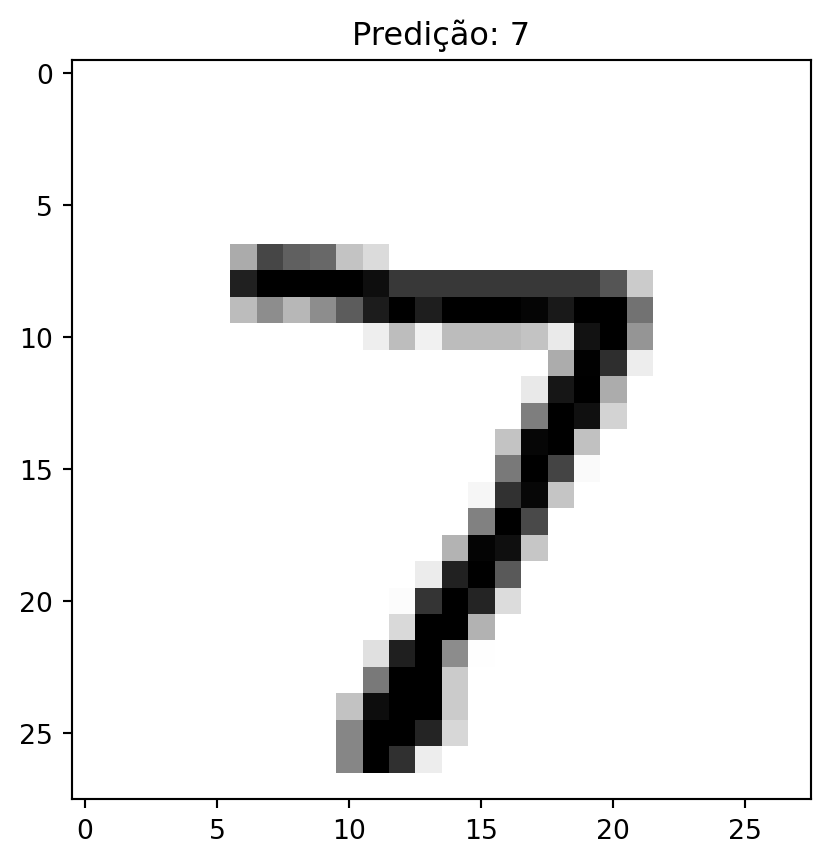

acertou
acertou
acertou
acertou
acertou
acertou
errou
acertou
acertou
acertou


In [4]:
predictions = model.predict(x_test)
plt.imshow(x_test[0], cmap=plt.cm.binary)
plt.title(f'Predição: {np.argmax(predictions[0])}')
plt.show()

random_indices = random.sample(range(len(x_test)), 10)
predictions_list = [np.argmax(predictions[idx]) for idx in random_indices]
real_values_list = [y_test[idx] for idx in random_indices]

for i, idx in enumerate(random_indices):
    if predictions_list[i] == real_values_list[i]:
        print(f"acertou")
    else:
        print(f"errou")

In [5]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

df = pd.read_csv('data/googlestore.csv')

print(df.head())

                               reviewId app_name  \
0  01e23c15-44bf-46b7-b280-40e880d9d49b   Shopee   
1  df40ba7c-075d-48dc-b798-21466dfb41d6   Shopee   
2  59490b23-b17b-4bba-855b-b5053dadc0db   Shopee   
3  48fd8168-1e42-4475-9a99-935c2fd48769   Shopee   
4  f4e1468b-6d97-4f1a-927d-1afee2bfbe75   Shopee   

                                             content sentiment_polarity  \
0  app shope razoá apes fácil utiliz apresent alg...           positive   
1  app bem otimiz fácil visual produt ped rastrei...           positive   
2  app bom prát fácil entend porém algum vend man...           positive   
3  aplic bom alg chate bast fat pesquis produt co...           positive   
4  app bom porém tid dificuldad pag cart crédit a...           negative   

  sentiment  
0   sadness  
1   sadness  
2   sadness  
3   sadness  
4   disgust  


In [6]:
nltk.download('stopwords')
nltk.download('rslp')

stop_words = stopwords.words('portuguese')
stemmer = RSLPStemmer()

def preprocess_text(text):
    if pd.isna(text):
        return ""
    text = text.lower()
    text = re.sub(r'[^a-záéíóúâêîôûãõç\s]', '', text)
    tokens = text.split()
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['clean_text'] = df['content'].apply(preprocess_text)

df = df[df['clean_text'].str.strip() != '']

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cocad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\cocad\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


In [7]:
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['clean_text']).toarray()
y = df['sentiment_polarity']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [9]:
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

Relatório de Classificação:
              precision    recall  f1-score   support

    negative       0.87      0.85      0.86       348
     neutral       0.29      0.12      0.17        17
    positive       0.79      0.85      0.82       237

    accuracy                           0.83       602
   macro avg       0.65      0.61      0.61       602
weighted avg       0.82      0.83      0.82       602



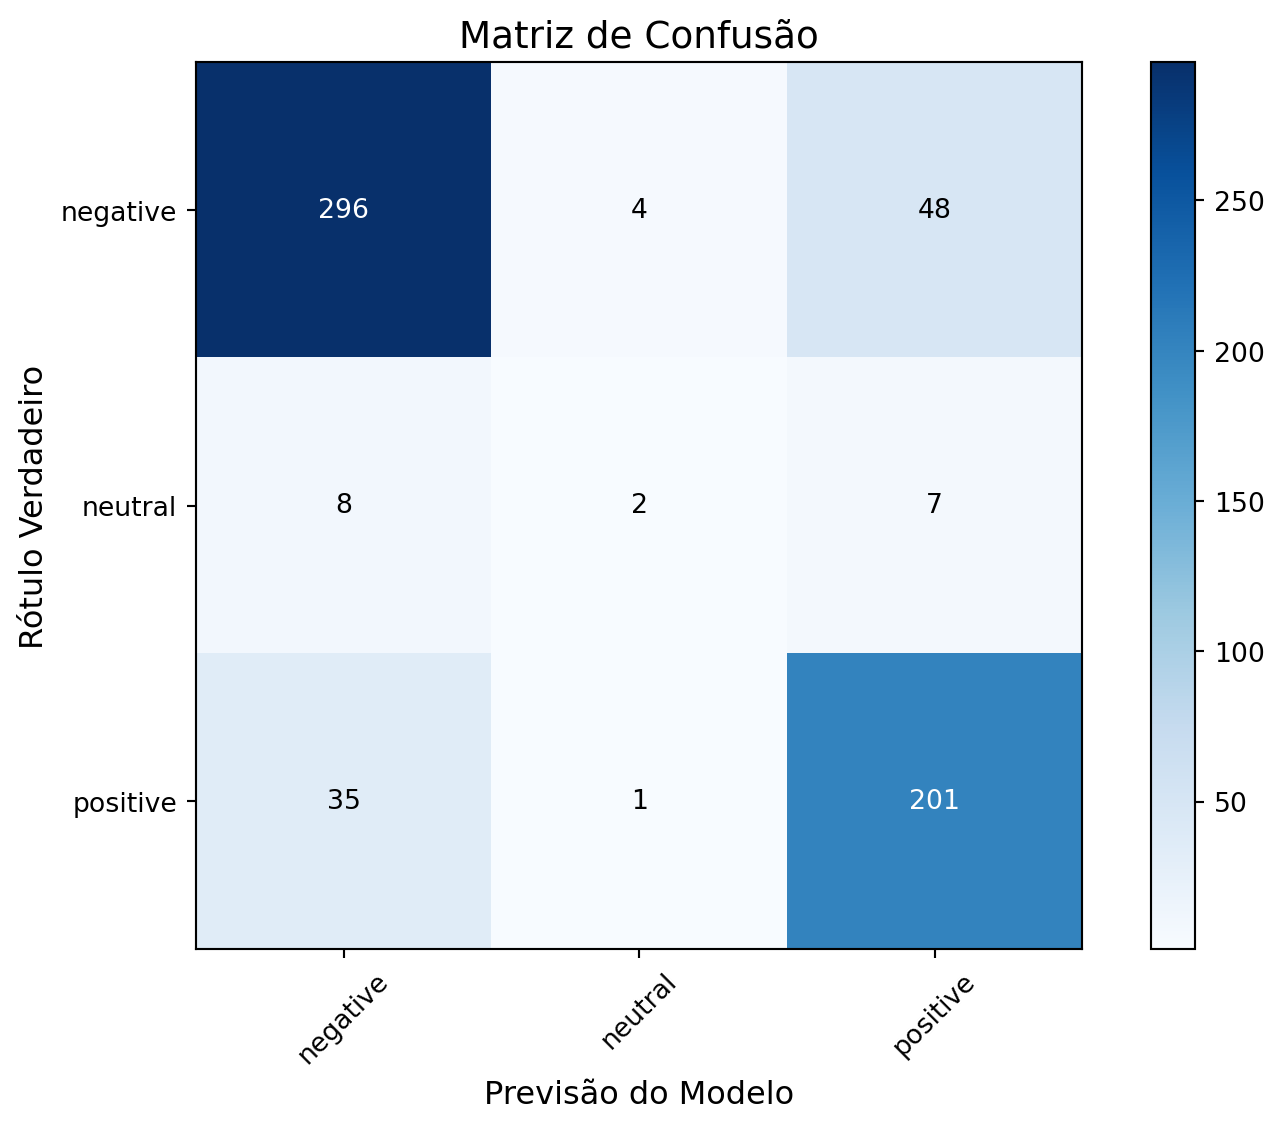

In [10]:
y_pred = model.predict(X_test)

print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

unique_labels = sorted(df['sentiment_polarity'].unique())

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusão', fontsize=14)
plt.colorbar()

tick_marks = np.arange(len(unique_labels))
plt.xticks(tick_marks, unique_labels, rotation=45)
plt.yticks(tick_marks, unique_labels)

thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('Rótulo Verdadeiro', fontsize=12)
plt.xlabel('Previsão do Modelo', fontsize=12)
plt.tight_layout()
plt.show()